In [327]:
'''
Title: Parkinsons Disease Data Set
Abstract: Oxford Parkinson's Disease Detection Dataset
https://archive.ics.uci.edu/ml/datasets/Parkinsons
'''

"\nTitle: Parkinsons Disease Data Set\nAbstract: Oxford Parkinson's Disease Detection Dataset\nhttps://archive.ics.uci.edu/ml/datasets/Parkinsons\n"

In [2]:
'''
If you use this dataset, please cite the following paper: 
'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)
'''

"\nIf you use this dataset, please cite the following paper: \n'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', \nLittle MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. \nBioMedical Engineering OnLine 2007, 6:23 (26 June 2007)\n"

In [3]:
'''
The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.
'''

'\nThe dataset was created by Max Little of the University of Oxford, in \ncollaboration with the National Centre for Voice and Speech, Denver, \nColorado, who recorded the speech signals. The original study published the \nfeature extraction methods for general voice disorders.\n'

In [4]:
'''
Data Set Characteristics: Multivariate
Number of Instances: 197
Area: Life
Attribute Characteristics: Real
Number of Attributes: 23
Date Donated: 2008-06-26
Associated Tasks: Classification
Missing Values? N/A
'''

'\nData Set Characteristics: Multivariate\nNumber of Instances: 197\nArea: Life\nAttribute Characteristics: Real\nNumber of Attributes: 23\nDate Donated: 2008-06-26\nAssociated Tasks: Classification\nMissing Values? N/A\n'

In [5]:
'''
Attribute Information:

Matrix column entries (attributes):
name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 
'''

"\nAttribute Information:\n\nMatrix column entries (attributes):\nname - ASCII subject name and recording number\nMDVP:Fo(Hz) - Average vocal fundamental frequency\nMDVP:Fhi(Hz) - Maximum vocal fundamental frequency\nMDVP:Flo(Hz) - Minimum vocal fundamental frequency\nMDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several \nmeasures of variation in fundamental frequency\nMDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude\nNHR,HNR - Two measures of ratio of noise to tonal components in the voice\nstatus - Health status of the subject (one) - Parkinson's, (zero) - healthy\nRPDE,D2 - Two nonlinear dynamical complexity measures\nDFA - Signal fractal scaling exponent\nspread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation \n"

In [631]:
#Import libraries for data manipulation and cleaning
import numpy as np
import pandas as pd
import scipy.stats as stats
import statistics

#Import libraries for visualization
import seaborn as sns
sns.set_theme(style="whitegrid", palette ='viridis')
sns.set(rc={'figure.figsize':(30,25)})
sns.set(font_scale=1.4)
palette = sns.color_palette( palette = 'viridis')
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from dtreeviz.trees import dtreeviz
#Import Scikit learn modules for scaling
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Import Scikit learn modules for generating our train and test models.
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import ML models for classification  
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets

#Meta-classifier
from xgboost import XGBClassifier

#Import Scikit learn metrics modules to evaluate the final model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv('parkinsons.data')

In [8]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [621]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
status,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MDVP:Fo(Hz),119.992000,122.400000,116.682000,116.676000,116.014000,120.552000,120.267000,107.332000,95.730000,95.056000,...,116.286000,116.556000,116.342000,114.563000,201.774000,174.188000,209.516000,174.688000,198.764000,214.289000
MDVP:Fhi(Hz),157.302000,148.650000,131.111000,137.871000,141.781000,131.162000,137.244000,113.840000,132.068000,120.103000,...,177.291000,592.030000,581.289000,119.167000,262.707000,230.978000,253.017000,240.005000,396.961000,260.277000
MDVP:Flo(Hz),74.997000,113.819000,111.555000,111.366000,110.655000,113.787000,114.820000,104.315000,91.754000,91.226000,...,96.983000,86.228000,94.246000,86.647000,78.228000,94.261000,89.488000,74.287000,74.904000,77.973000
MDVP:Jitter(%),0.007840,0.009680,0.010500,0.009970,0.012840,0.009680,0.003330,0.002900,0.005510,0.005320,...,0.003140,0.004960,0.002670,0.003270,0.006940,0.004590,0.005640,0.013600,0.007400,0.005670
MDVP:Jitter(Abs),0.000070,0.000080,0.000090,0.000090,0.000110,0.000080,0.000030,0.000030,0.000060,0.000060,...,0.000030,0.000040,0.000020,0.000030,0.000030,0.000030,0.000030,0.000080,0.000040,0.000030
MDVP:RAP,0.003700,0.004650,0.005440,0.005020,0.006550,0.004630,0.001550,0.001440,0.002930,0.002680,...,0.001340,0.002540,0.001150,0.001460,0.004120,0.002630,0.003310,0.006240,0.003700,0.002950
MDVP:PPQ,0.005540,0.006960,0.007810,0.006980,0.009080,0.007500,0.002020,0.001820,0.003320,0.003320,...,0.001920,0.002630,0.001480,0.001840,0.003960,0.002590,0.002920,0.005640,0.003900,0.003170
Jitter:DDP,0.011090,0.013940,0.016330,0.015050,0.019660,0.013880,0.004660,0.004310,0.008800,0.008030,...,0.004030,0.007620,0.003450,0.004390,0.012350,0.007900,0.009940,0.018730,0.011090,0.008850
MDVP:Shimmer,0.043740,0.061340,0.052330,0.054920,0.064250,0.047010,0.016080,0.015670,0.020930,0.028380,...,0.015640,0.016600,0.013000,0.011850,0.025740,0.040870,0.027510,0.023080,0.022960,0.018840


'name' column is of no particular interest, it will be dropped for simplicity purposes.

In [10]:
data.drop(['name'],axis=1,inplace=True)

In [11]:
data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [12]:
data.status.value_counts()[0]/data.status.value_counts()[1]

0.32653061224489793

There is a ratio of about 1:3 of non Parkinson disease to Parkinson disease

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

All values are numeric and there is no missing data.

In [14]:
temp_group=data.groupby(by='status')['status'].count()

In [15]:
temp_group

status
0     48
1    147
Name: status, dtype: int64

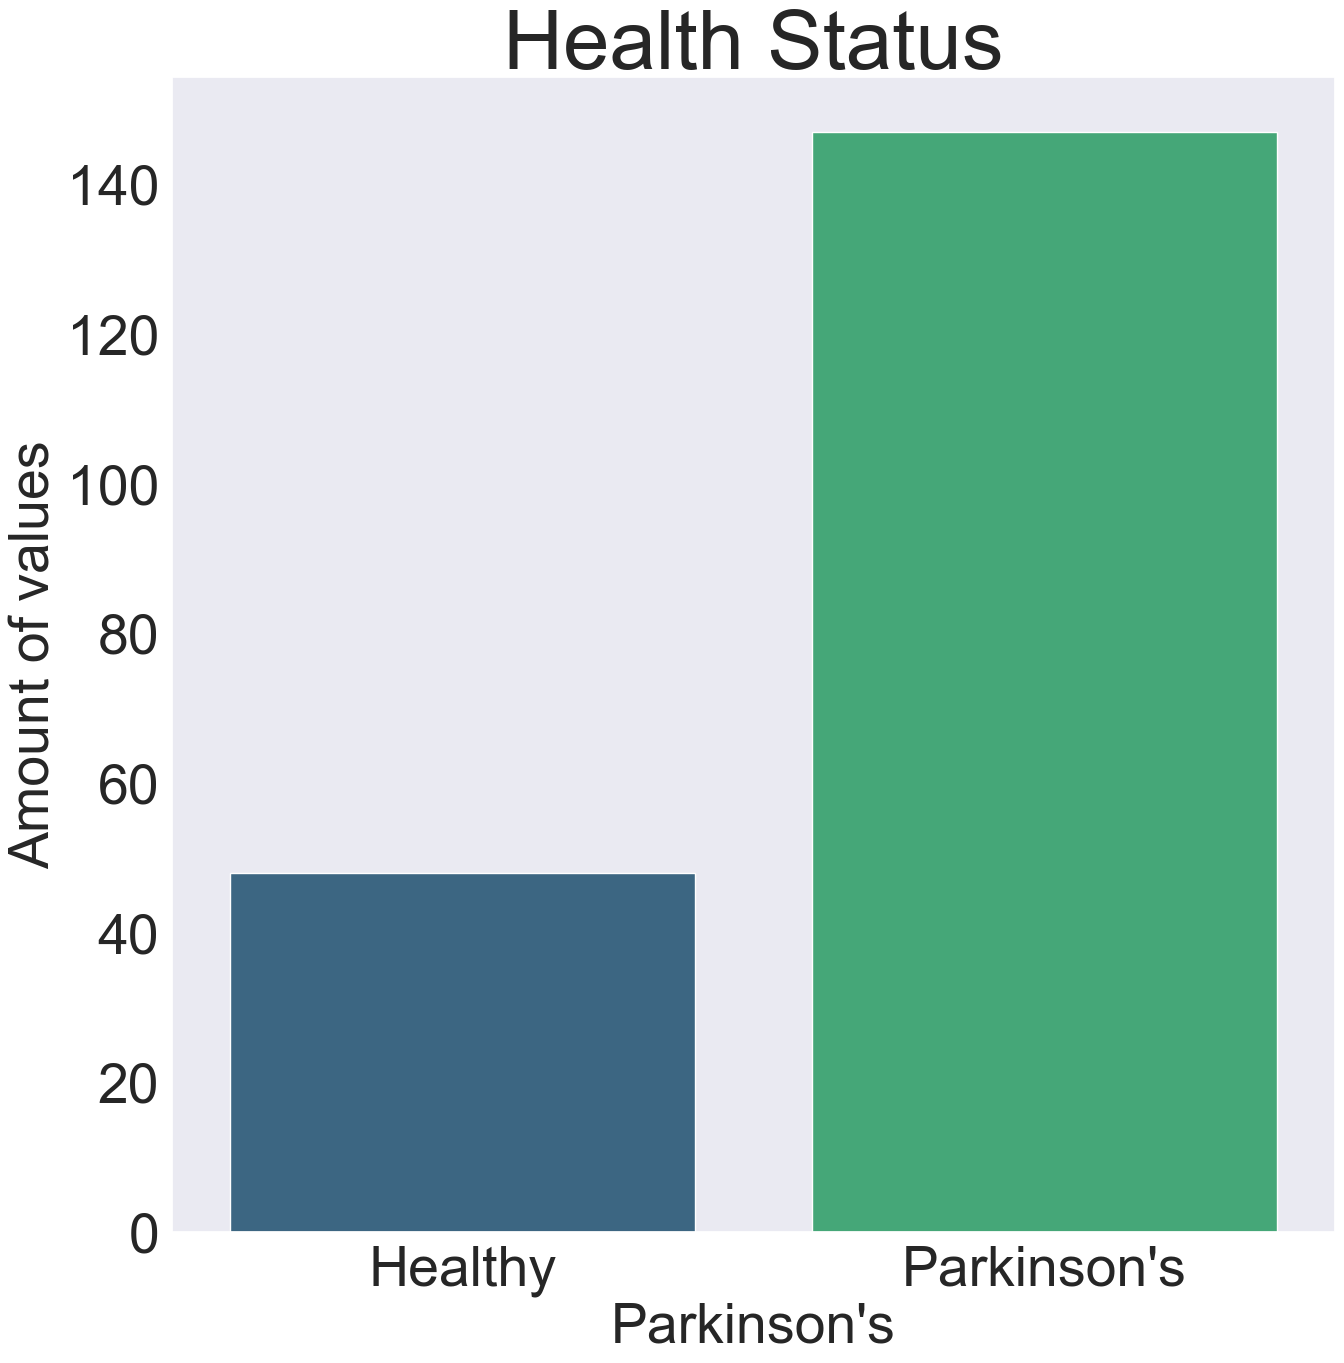

In [620]:
sns.barplot(data=temp_group,x=temp_group.index,y=temp_group, 
            palette=sns.color_palette('viridis',temp_group.unique().shape[0]))
title_font = {'size':'60'}
plt.title("Health Status",fontdict=title_font)
plt.grid(False)
label_font = {'size':'40'}  # Adjust to fit
plt.xlabel("Parkinson's", fontdict=label_font);
plt.ylabel('Amount of values', fontdict=label_font);

  # Adjust to fit
plt.xticks([0, 1], ['Healthy', "Parkinson's"])
plt.tick_params(axis='both', which='major', labelsize=40)  # Adjust to fit
plt.show()

There are 147 diagnosed with parkinson disease and 48 diagnosed without it.

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


Due to the spread in values from the data a scaling method must be applied for the ML model.

In [18]:
#Repositon status to the 1st column.
temp_cols=data.columns.tolist()
index=data.columns.get_loc("status")
new_cols=temp_cols[index:index+1] + temp_cols[0:index] + temp_cols[index+1:]
data=data[new_cols]

In [19]:
data.columns[0]

'status'

<function matplotlib.pyplot.show(close=None, block=None)>

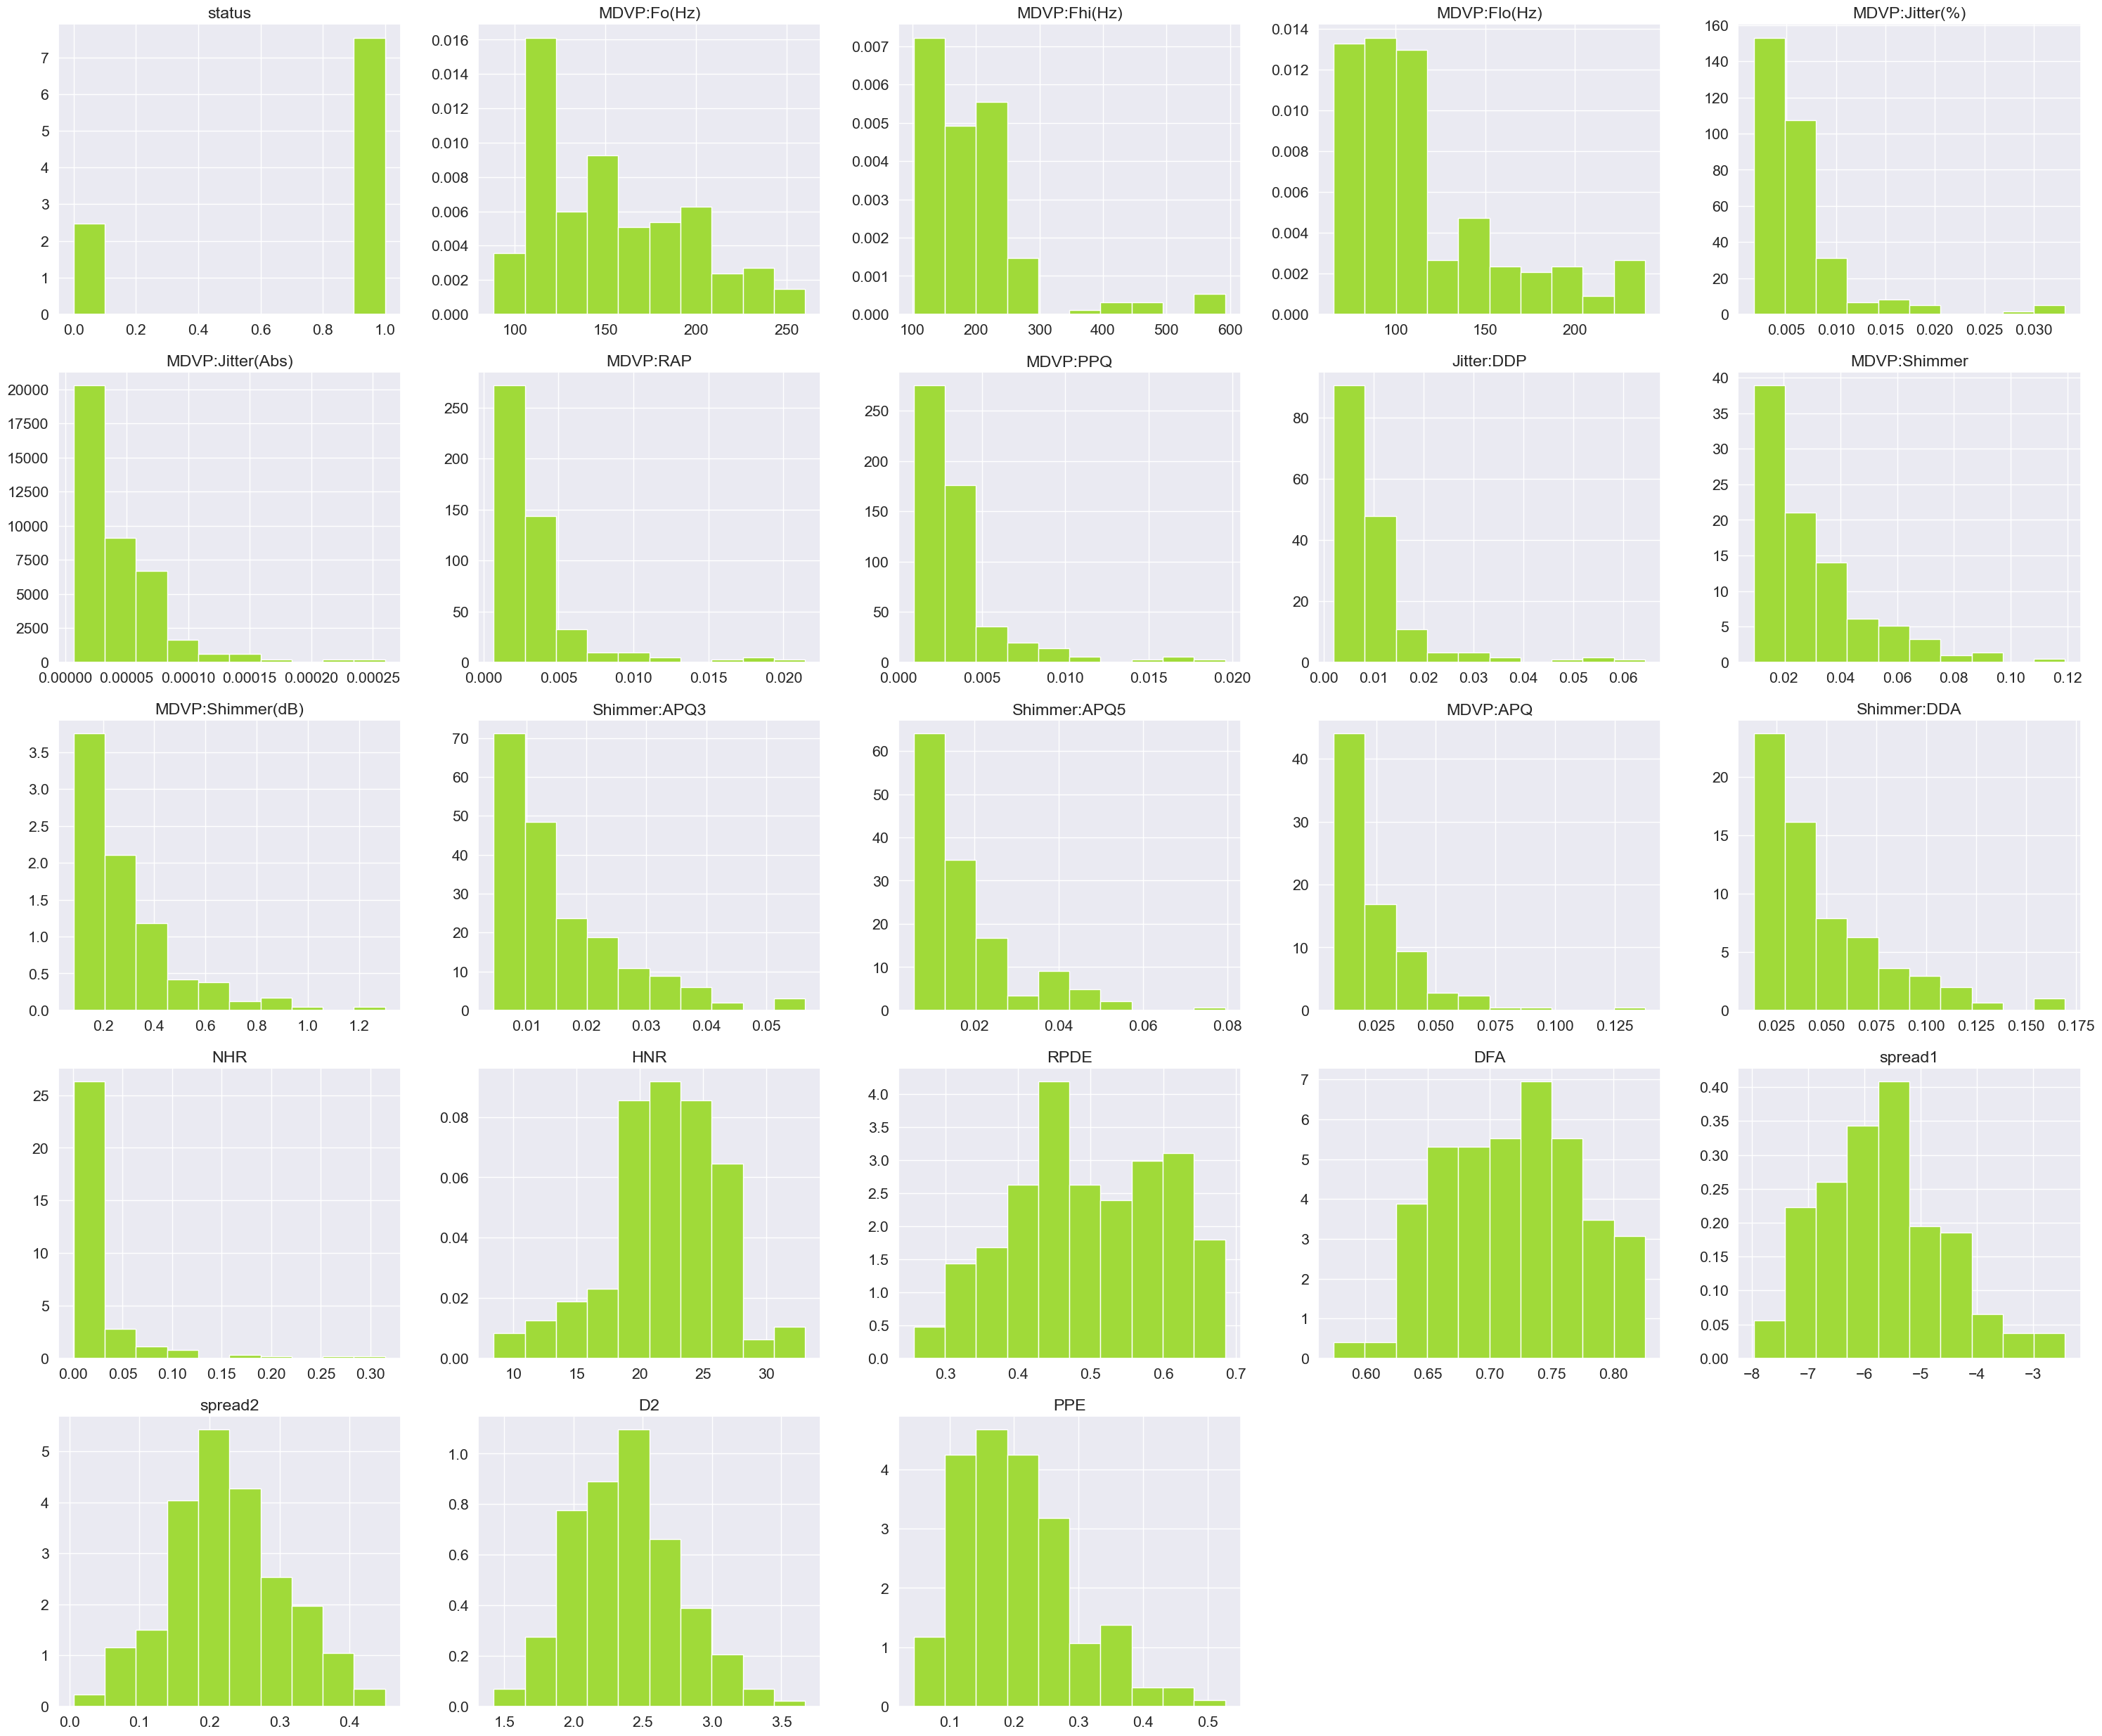

In [20]:
data.hist(color=palette[5],density=True)
plt.tight_layout()
plt.show

Skewness is definitely present. All variables skew must be studied.

In [21]:
data.skew()

status             -1.187727
MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

# Skewness 
This attributes present skewness to the right:

MVDP:Fo(Hz), MVDP:Flo(Hz), MVDP:Fhi(Hz), MVDP: Jitter(%)
MVDP: Jitter(Abs), MDVP:RAP, MDVP:PPQ, JITTER:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA,NHR

This will be taken into consideration further.

<AxesSubplot: >

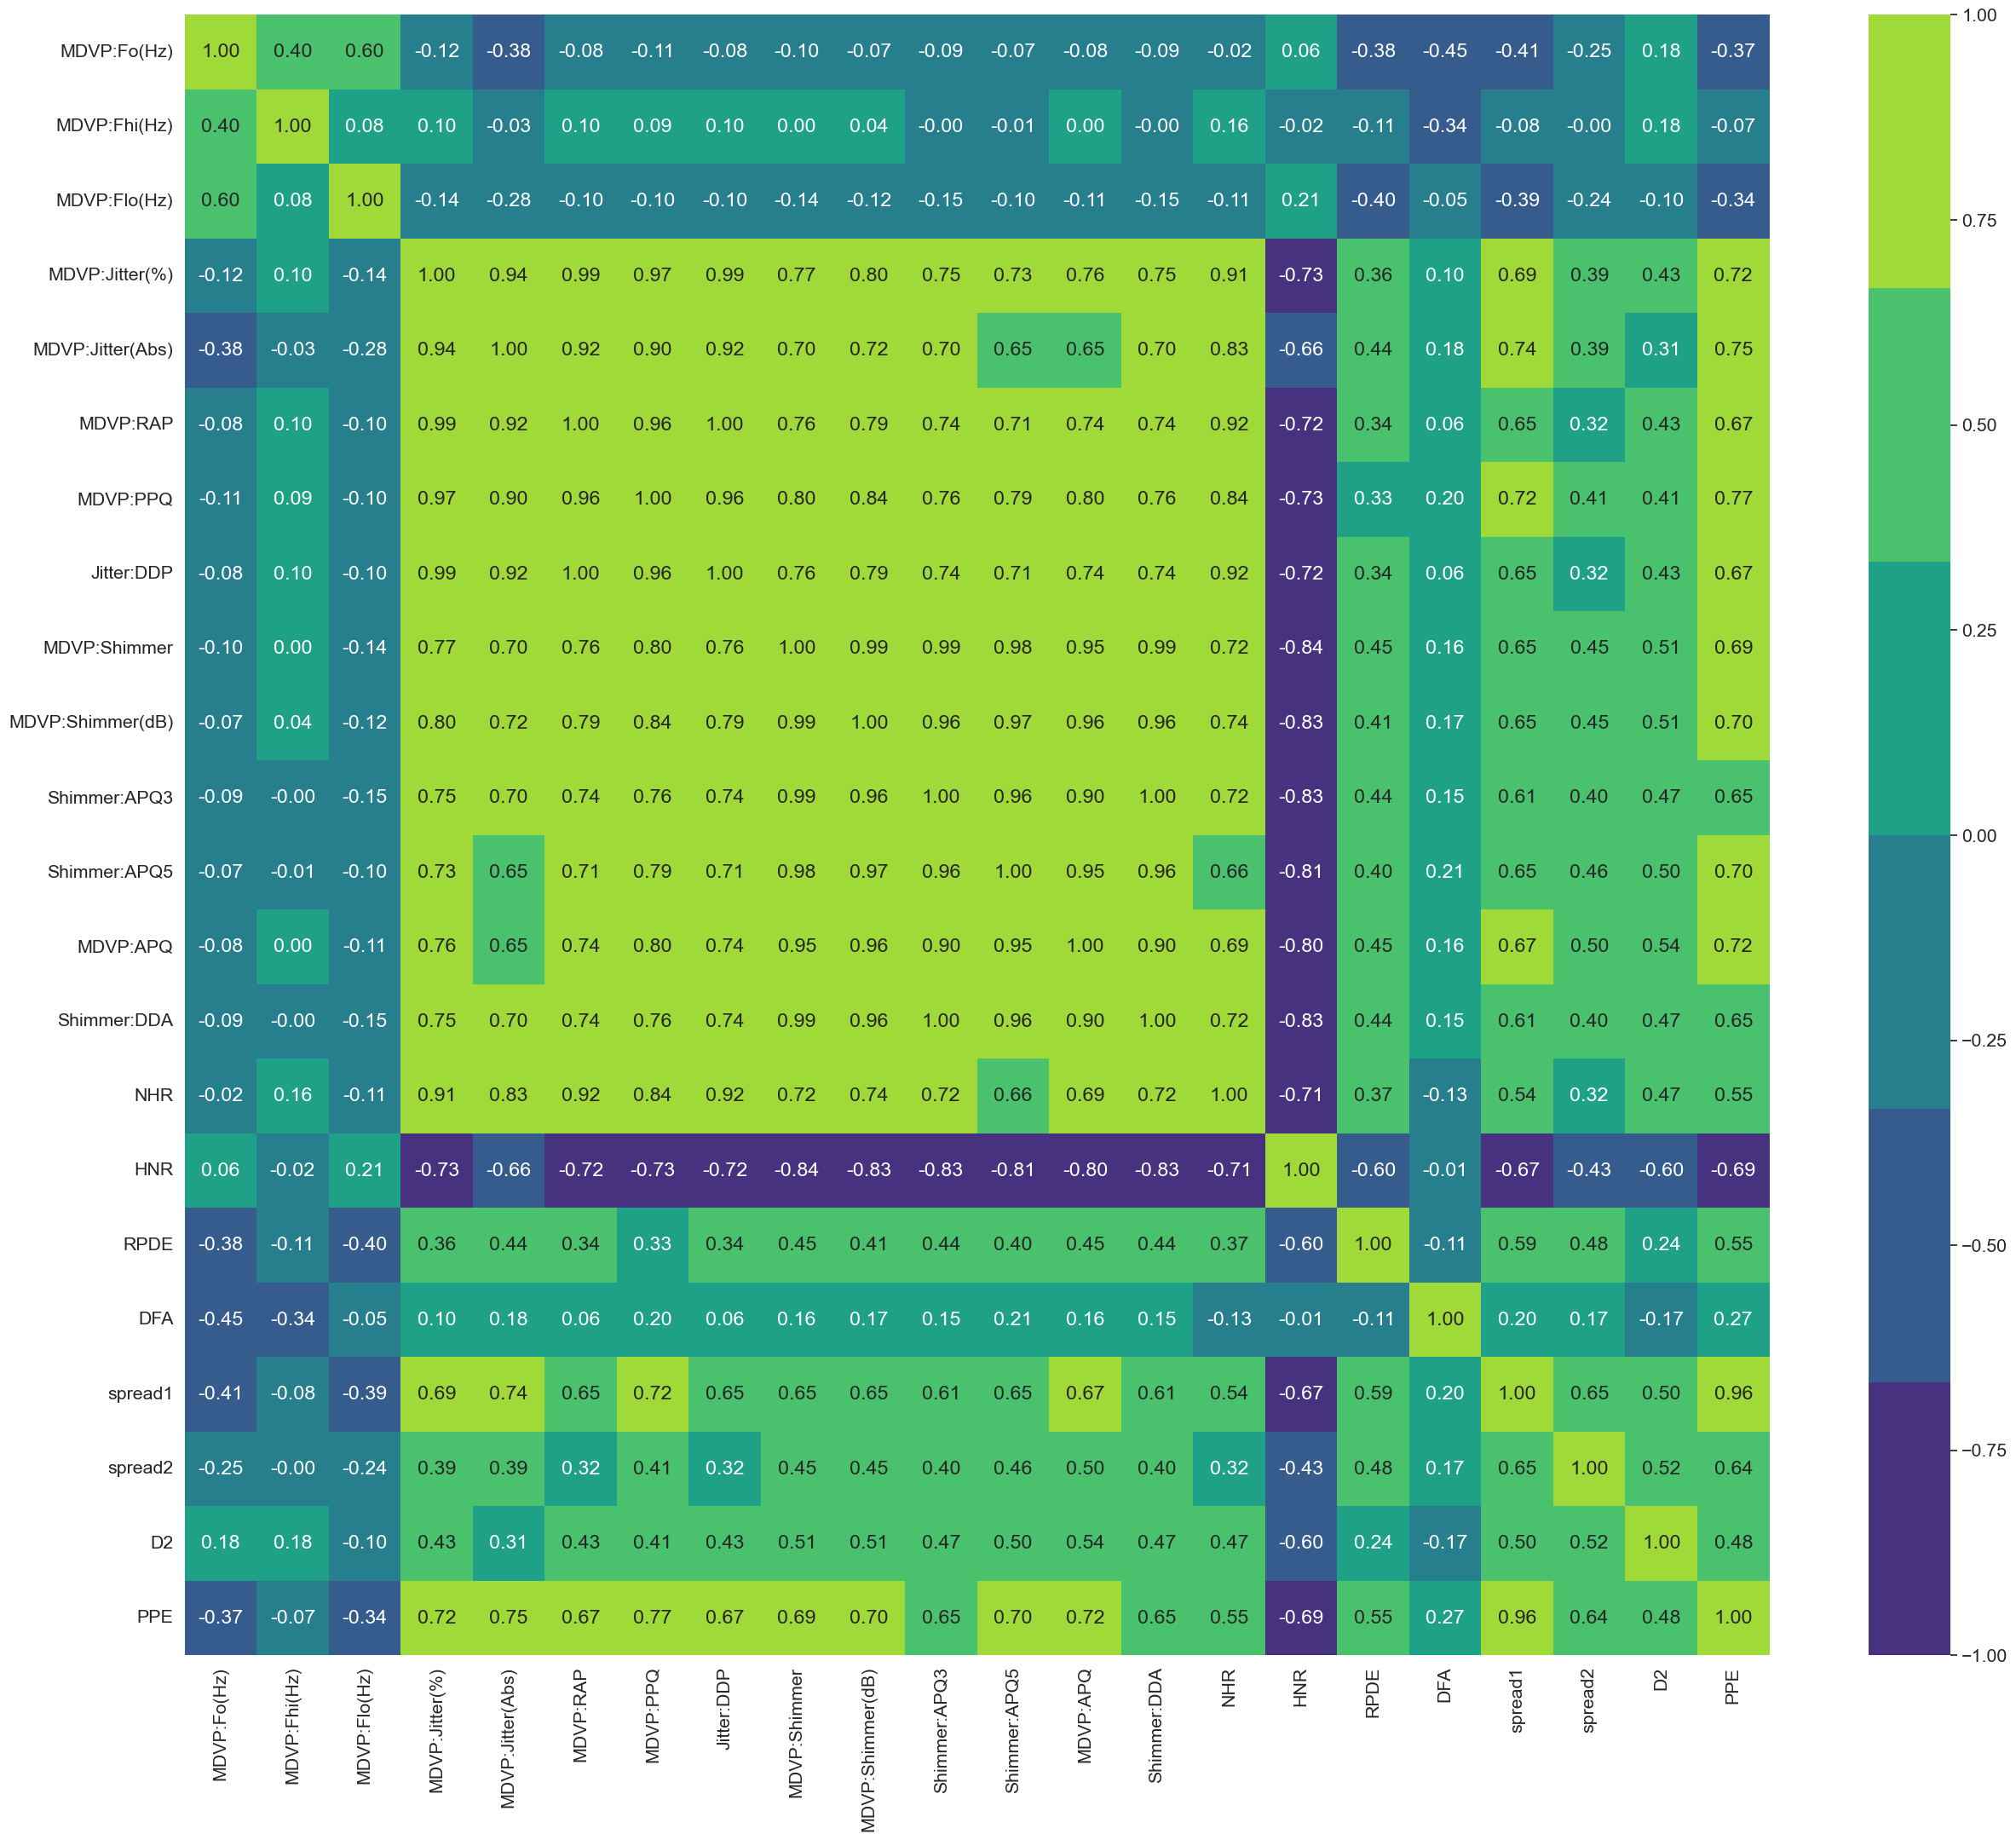

In [22]:
sns.heatmap(data.iloc[::,1:].corr(),annot=True,vmin=-1,cmap=palette,vmax=1,fmt=".2f")

There exists high autocorrelation in multiple variables.
This will be dealt by using Variance Inflation Factor(VIF). In VIF method, we pick each feature and regress it against all of the other features.

Now that we know the nature of the data, variables will be grouped to study them.

# Vocal fundamental frequency 
MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

In [23]:
A=data[data.columns].corr()['MDVP:Fo(Hz)']
B=data[data.columns].corr()['MDVP:Fhi(Hz)']
C=data[data.columns].corr()['MDVP:Flo(Hz)']
pd.concat([A,B,C],axis=1)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz)
status,-0.383535,-0.166136,-0.380200
MDVP:Fo(Hz),1.000000,0.400985,0.596546
MDVP:Fhi(Hz),0.400985,1.000000,0.084951
MDVP:Flo(Hz),0.596546,0.084951,1.000000
MDVP:Jitter(%),-0.118003,0.102086,-0.139919
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815
MDVP:RAP,-0.076194,0.097177,-0.100519
MDVP:PPQ,-0.112165,0.091126,-0.095828
Jitter:DDP,-0.076213,0.097150,-0.100488
MDVP:Shimmer,-0.098374,0.002281,-0.144543


There is correlation between:

1.-MDVP:Fo(Hz) and MDVP:Flo(Hz)

2.-MDVP:Fo(Hz) and MDVP:Fhi(Hz)

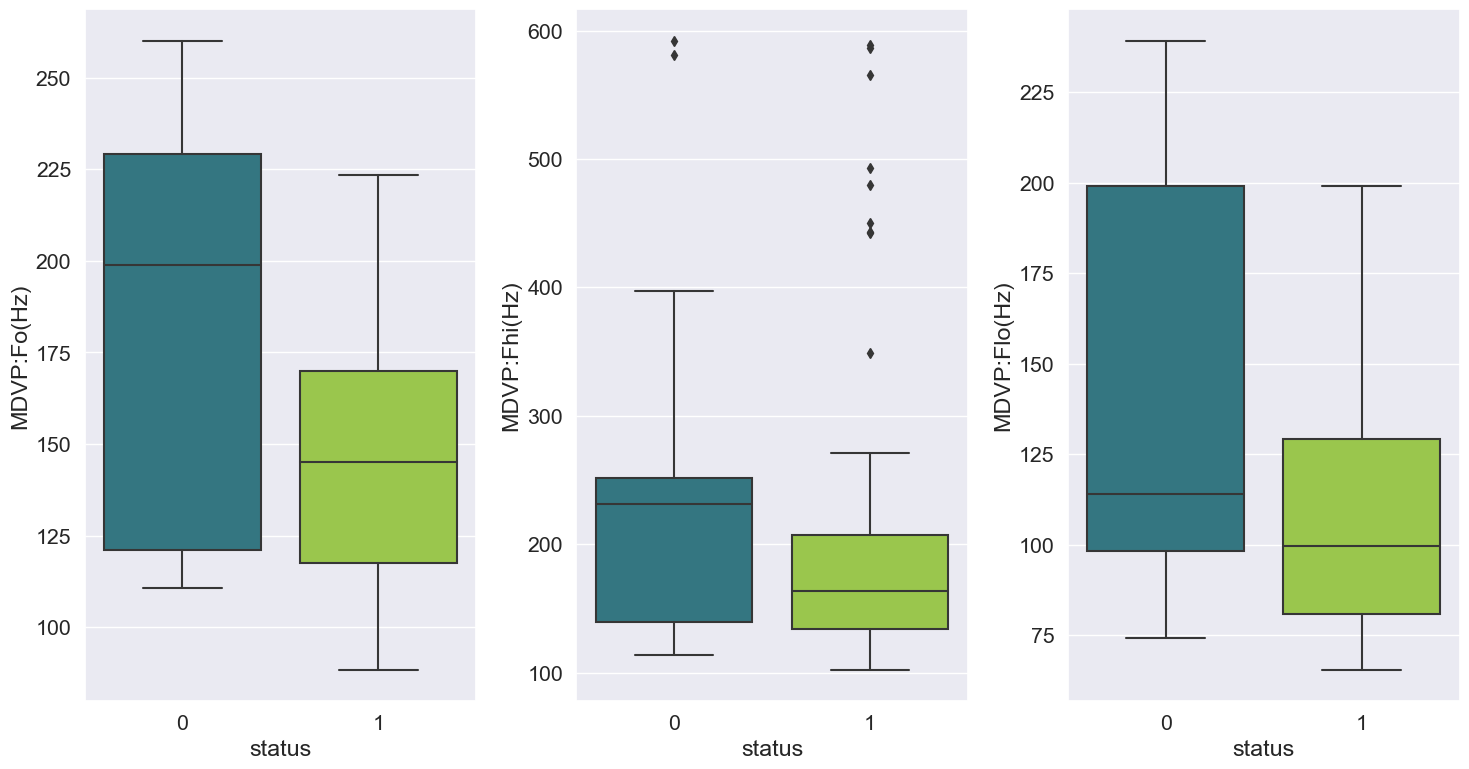

In [24]:
fig, ax = plt.subplots(1,3,figsize=(15,8))
sns.boxplot(x=data['status'],y=data['MDVP:Fo(Hz)'],ax=ax[0],palette=palette[2:7:3]) 
sns.boxplot(x=data['status'],y=data['MDVP:Fhi(Hz)'],ax=ax[1],palette=palette[2:7:3])
sns.boxplot(x=data['status'],y=data['MDVP:Flo(Hz)'],ax=ax[2],palette=palette[2:7:3])
plt.tight_layout()
plt.show()

MDVP:Fhi(Hz) and MDVP:Flo(Hz) seem to have significant amount of outliers

# Measures of variation in fundamental frequency
MDVP:Jitter(%)

MDVP:Jitter(Abs)

MDVP:RAP

MDVP:PPQ

Jitter:DDP


In [25]:
D=data[data.columns].corr()['MDVP:Jitter(%)']
E=data[data.columns].corr()['MDVP:Jitter(Abs)']
F=data[data.columns].corr()['MDVP:RAP']
G=data[data.columns].corr()['MDVP:PPQ']
H=data[data.columns].corr()['Jitter:DDP']
pd.concat([D,E,F,G,H],axis=1)

,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
status,0.278220,0.338653,0.266668,0.288698,0.266646
MDVP:Fo(Hz),-0.118003,-0.382027,-0.076194,-0.112165,-0.076213
MDVP:Fhi(Hz),0.102086,-0.029198,0.097177,0.091126,0.097150
MDVP:Flo(Hz),-0.139919,-0.277815,-0.100519,-0.095828,-0.100488
MDVP:Jitter(%),1.000000,0.935714,0.990276,0.974256,0.990276
MDVP:Jitter(Abs),0.935714,1.000000,0.922911,0.897778,0.922913
MDVP:RAP,0.990276,0.922911,1.000000,0.957317,1.000000
MDVP:PPQ,0.974256,0.897778,0.957317,1.000000,0.957319
Jitter:DDP,0.990276,0.922913,1.000000,0.957319,1.000000
MDVP:Shimmer,0.769063,0.703322,0.759581,0.797826,0.759555


The correlation between measures of variation in fundamental frequency is actually low, however there is high corelation between all the other variables in data.

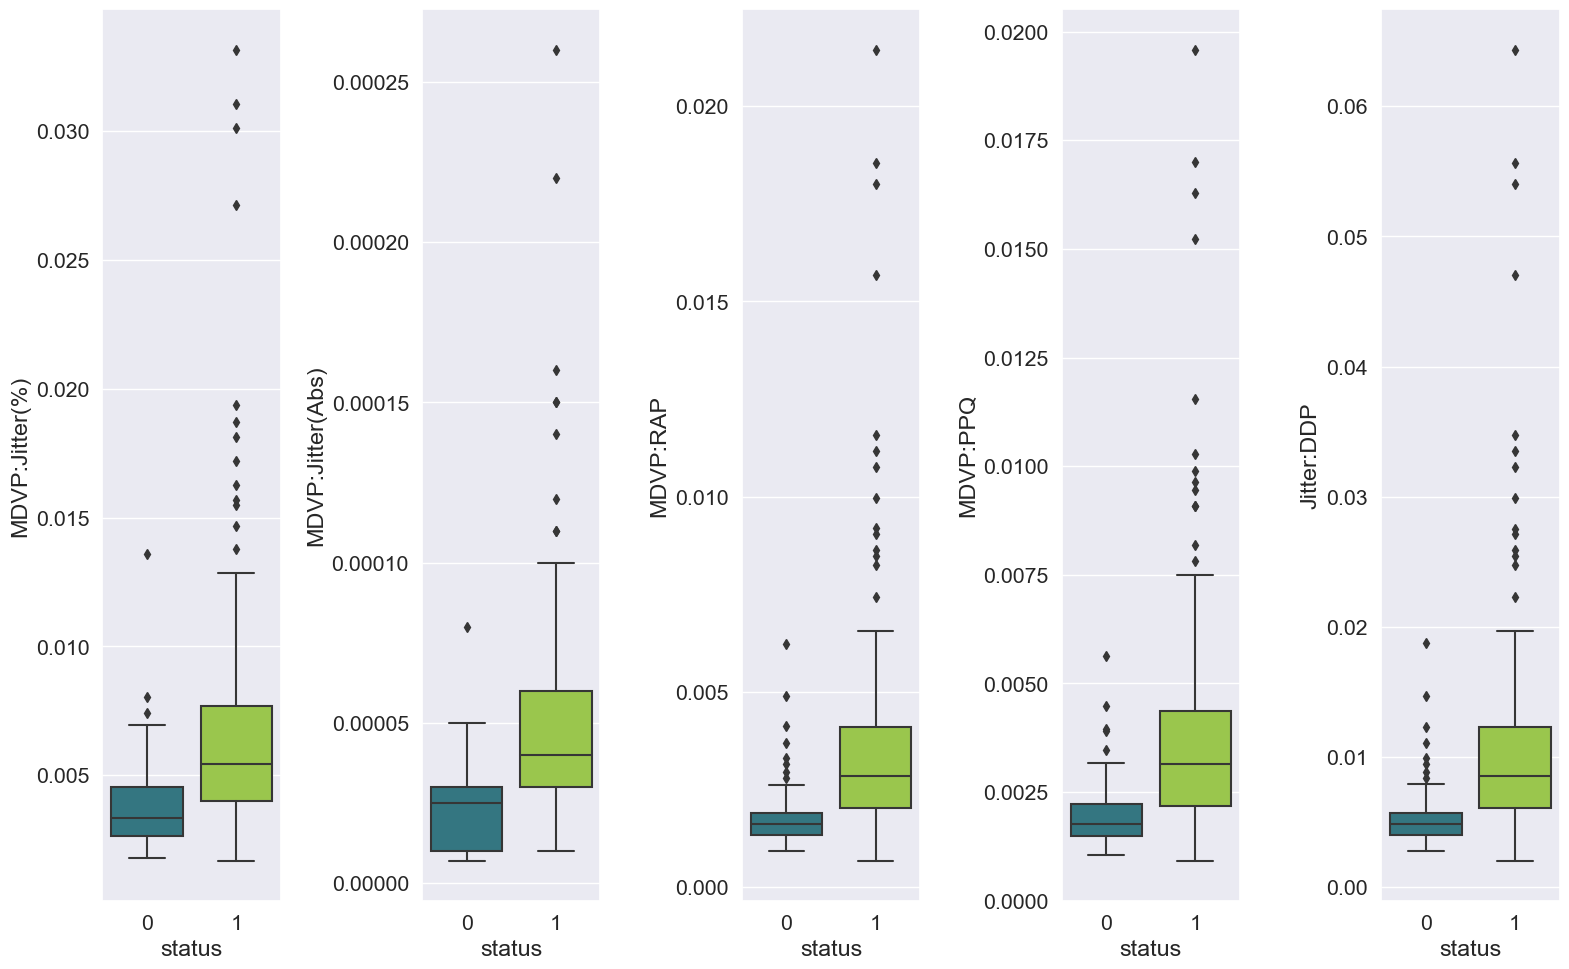

In [26]:
fig, ax = plt.subplots(1,5,figsize=(16,10)) 
sns.boxplot(x=data['status'],y=data['MDVP:Jitter(%)'],ax=ax[0],palette=palette[2:7:3])
sns.boxplot(x=data['status'],y=data['MDVP:Jitter(Abs)'],ax=ax[1],palette=palette[2:7:3])
sns.boxplot(x=data['status'],y=data['MDVP:RAP'],ax=ax[2],palette=palette[2:7:3])
sns.boxplot(x=data['status'],y=data['MDVP:PPQ'],ax=ax[3],palette=palette[2:7:3])
sns.boxplot(x=data['status'],y=data['Jitter:DDP'],ax=ax[4],palette=palette[2:7:3])
plt.tight_layout()
plt.show()

Outliers are present in all 5 variables.

# Measures of variation in amplitude
MDVP:Shimmer

MDVP:Shimmer(dB)

Shimmer:APQ3

Shimmer:APQ5

MDVP:APQ

Shimmer:DDA

In [27]:
I=data[data.columns].corr()['MDVP:Shimmer']
J=data[data.columns].corr()['MDVP:Shimmer(dB)']
K=data[data.columns].corr()['Shimmer:APQ3']
L=data[data.columns].corr()['Shimmer:APQ5']
M=data[data.columns].corr()['MDVP:APQ']
N=data[data.columns].corr()['Shimmer:DDA']
pd.concat([I,J,K,L,M,N],axis=1)

,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
status,0.367430,0.350697,0.347617,0.351148,0.364316,0.347608
MDVP:Fo(Hz),-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732
MDVP:Fhi(Hz),0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733
MDVP:Flo(Hz),-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737
MDVP:Jitter(%),0.769063,0.804289,0.746625,0.725561,0.758255,0.746635
MDVP:Jitter(Abs),0.703322,0.716601,0.697153,0.648961,0.648793,0.697170
MDVP:RAP,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919
MDVP:PPQ,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592
Jitter:DDP,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901
MDVP:Shimmer,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626


There is low correlation between measures of variation amplitude and vocal fundamental frequency, but there is high correlation between all the attributes of the data.

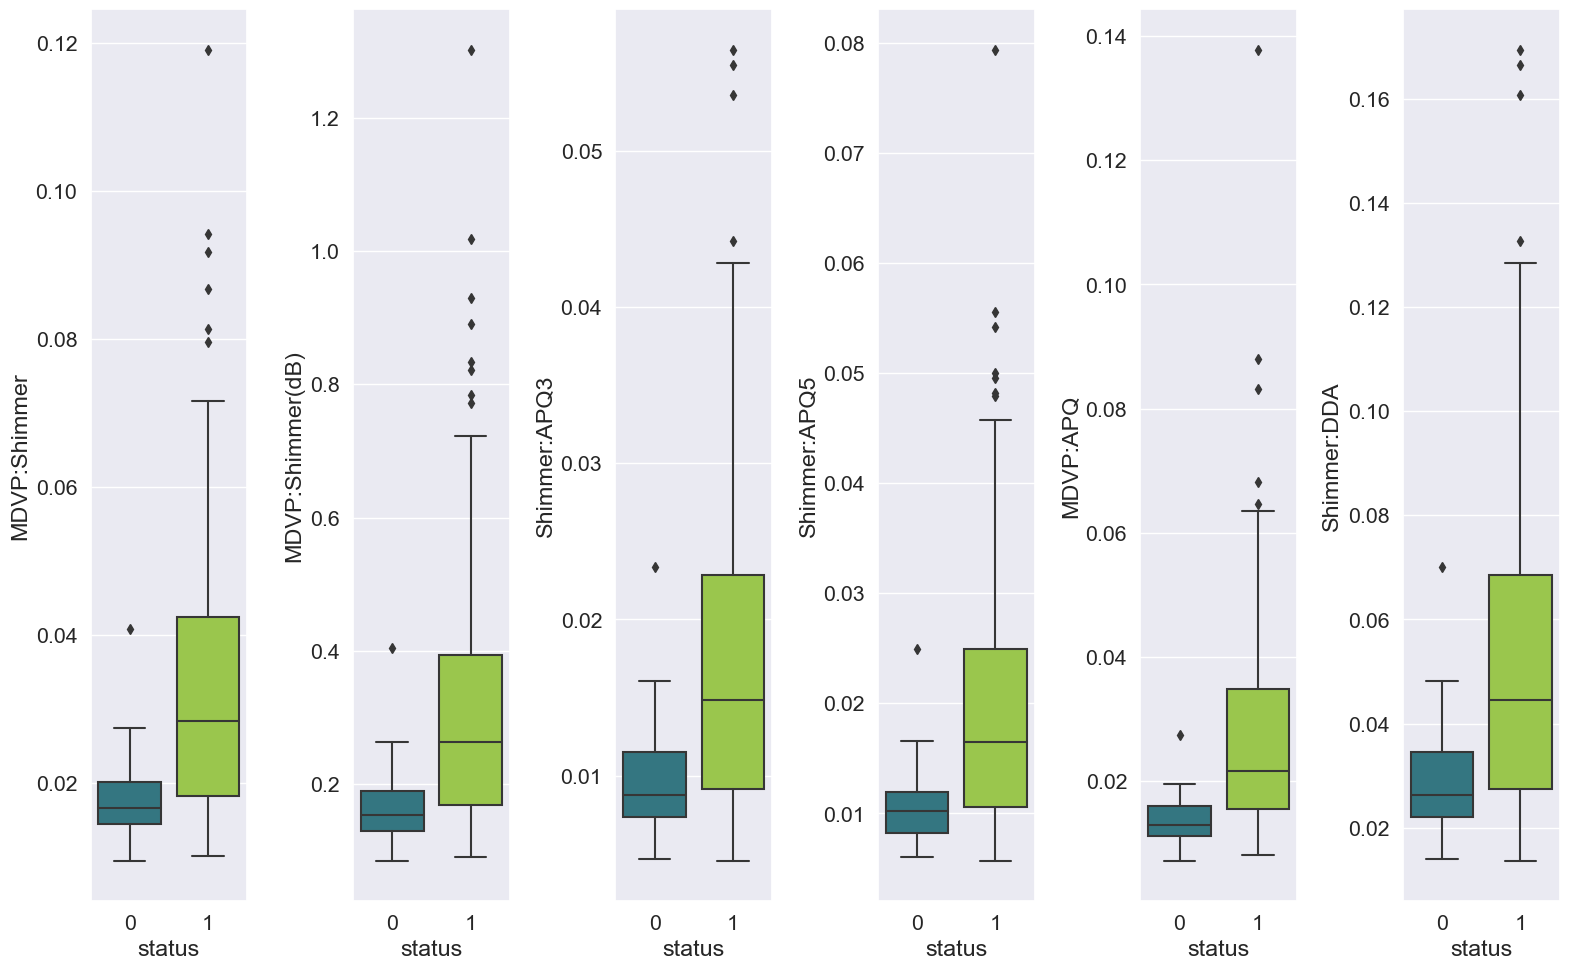

In [28]:
fig, ax = plt.subplots(1,6,figsize=(16,10)) 
sns.boxplot(x=data['status'],y=data['MDVP:Shimmer'],ax=ax[0],palette=palette[2:7:3]) 
sns.boxplot(x=data['status'],y=data['MDVP:Shimmer(dB)'],ax=ax[1],palette=palette[2:7:3])
sns.boxplot(x=data['status'],y=data['Shimmer:APQ3'],ax=ax[2],palette=palette[2:7:3])
sns.boxplot(x=data['status'],y=data['Shimmer:APQ5'],ax=ax[3],palette=palette[2:7:3])
sns.boxplot(x=data['status'],y=data['MDVP:APQ'],ax=ax[4],palette=palette[2:7:3])
sns.boxplot(x=data['status'],y=data['Shimmer:DDA'],ax=ax[5],palette=palette[2:7:3])
plt.tight_layout()
plt.show()

There are few outliers in Shimmer:APQ3 and Shimmer:DDA. In MDVP:Shimmer, MDVP:Shimmer(dB) and MDVP:APQ

# Two measures of ratio of noise to tonal components in the voice
 NHR
 
 HNR 

In [29]:
O=data[data.columns].corr()['NHR']
P=data[data.columns].corr()['HNR']
pd.concat([O,P],axis=1)

,NHR,HNR
status,0.189429,-0.361515
MDVP:Fo(Hz),-0.021981,0.059144
MDVP:Fhi(Hz),0.163766,-0.024893
MDVP:Flo(Hz),-0.108670,0.210851
MDVP:Jitter(%),0.906959,-0.728165
MDVP:Jitter(Abs),0.834972,-0.656810
MDVP:RAP,0.919521,-0.721543
MDVP:PPQ,0.844604,-0.731510
Jitter:DDP,0.919548,-0.721494
MDVP:Shimmer,0.722194,-0.835271


There is not much correlation between NHR and HNR and vocal fundamental frequency, but there is between all the other variables.

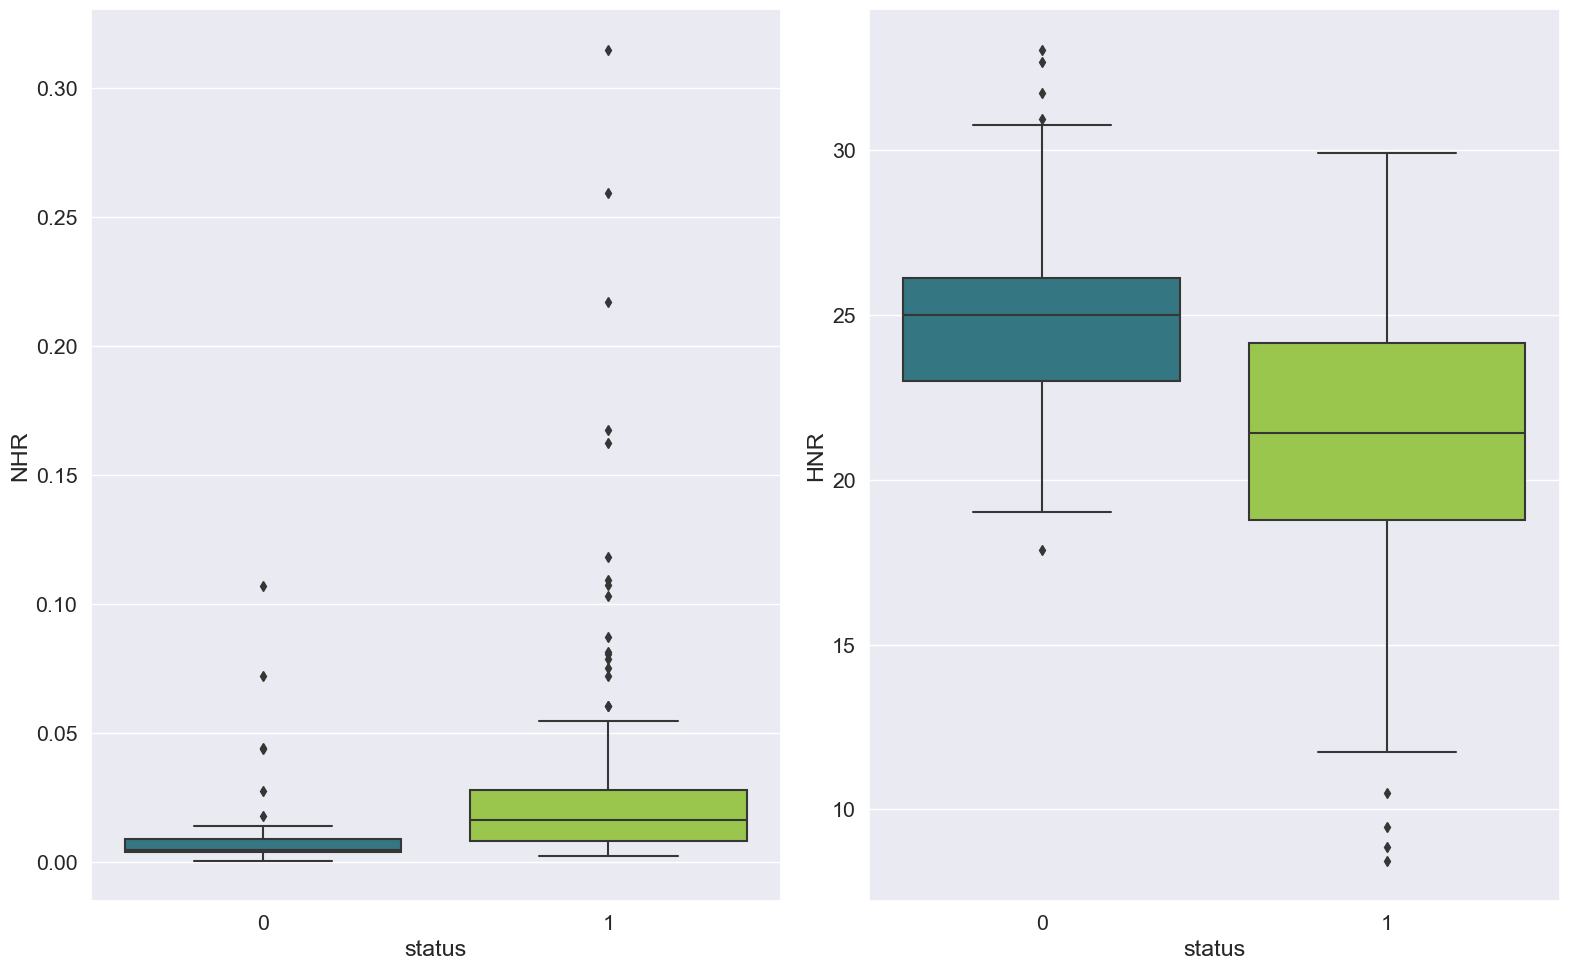

In [30]:
fig, ax = plt.subplots(1,2,figsize=(16,10)) 
sns.boxplot(x=data['status'],y=data['NHR'],ax=ax[0],palette=palette[2:7:3]) 
sns.boxplot(x=data['status'],y=data['HNR'],ax=ax[1],palette=palette[2:7:3])
plt.tight_layout()
plt.show()

There are little outliers in HNR and multiple in NHR

# Two nonlinear dynamical complexity measures
RPDE

D2

In [31]:
Q=data[data.columns].corr()['RPDE']
R=data[data.columns].corr()['D2']
pd.concat([Q,R],axis=1)

,RPDE,D2
status,0.308567,0.340232
MDVP:Fo(Hz),-0.383894,0.177980
MDVP:Fhi(Hz),-0.112404,0.176323
MDVP:Flo(Hz),-0.400143,-0.100629
MDVP:Jitter(%),0.360673,0.433434
MDVP:Jitter(Abs),0.441839,0.310694
MDVP:RAP,0.342140,0.426605
MDVP:PPQ,0.333274,0.412524
Jitter:DDP,0.342079,0.426556
MDVP:Shimmer,0.447424,0.507088


There is not much correlation between RPDE and D2 and vocal fundamental frequency, but there is more between all the other variables.

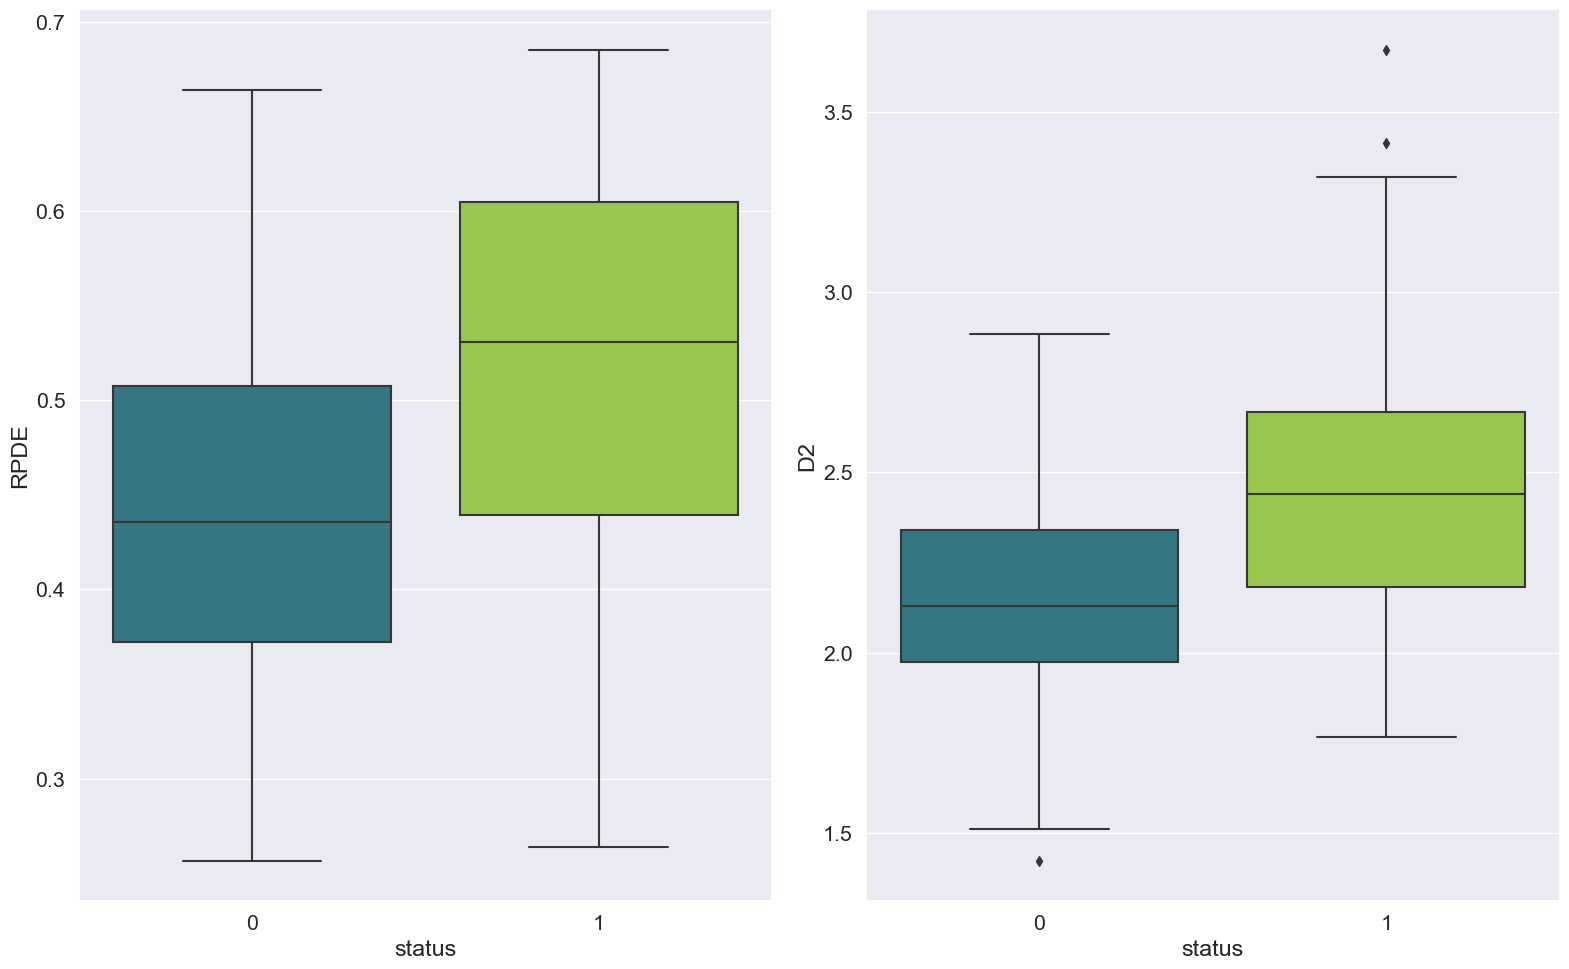

In [32]:
fig, ax = plt.subplots(1,2,figsize=(16,10)) 
sns.boxplot(x=data['status'],y=data['RPDE'],ax=ax[0],palette=palette[2:7:3]) 
sns.boxplot(x=data['status'],y=data['D2'],ax=ax[1],palette=palette[2:7:3])
plt.tight_layout()
plt.show()

There are some outliers.

# Three nonlinear measures of fundamental frequency variation
spread1

spread2

PPE

In [33]:
S=data[data.columns].corr()['spread1']
T=data[data.columns].corr()['spread2']
V=data[data.columns].corr()['PPE']
pd.concat([S,T,V],axis=1)

,spread1,spread2,PPE
status,0.564838,0.454842,0.531039
MDVP:Fo(Hz),-0.413738,-0.249450,-0.372356
MDVP:Fhi(Hz),-0.076658,-0.002954,-0.069543
MDVP:Flo(Hz),-0.394857,-0.243829,-0.340071
MDVP:Jitter(%),0.693577,0.385123,0.721543
MDVP:Jitter(Abs),0.735779,0.388543,0.748162
MDVP:RAP,0.648328,0.324407,0.670999
MDVP:PPQ,0.716489,0.407605,0.769647
Jitter:DDP,0.648328,0.324377,0.671005
MDVP:Shimmer,0.654734,0.452025,0.693771


There is high correlation between variables

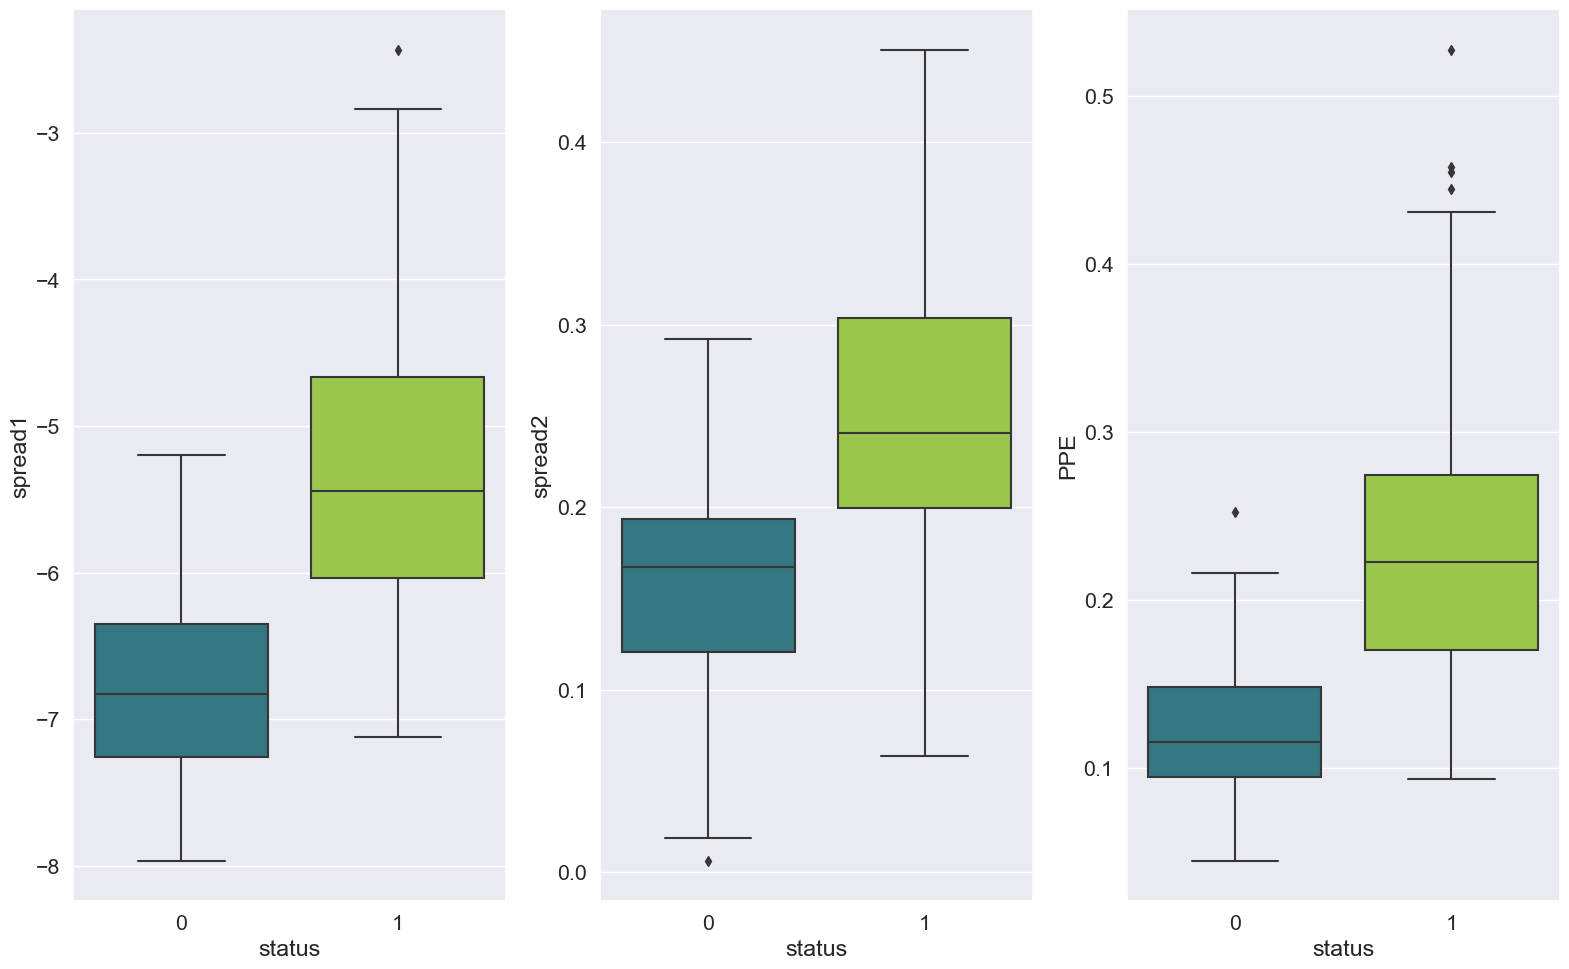

In [34]:
fig, ax = plt.subplots(1,3,figsize=(16,10)) 
sns.boxplot(x=data['status'],y=data['spread1'],ax=ax[0],palette=palette[2:7:3]) 
sns.boxplot(x=data['status'],y=data['spread2'],ax=ax[1],palette=palette[2:7:3])
sns.boxplot(x=data['status'],y=data['PPE'],ax=ax[2],palette=palette[2:7:3])
plt.tight_layout()
plt.show()

There are not many outliers

# Signal fractal scaling exponent
DFA

In [35]:
pd.DataFrame(data[data.columns].corr()['DFA'])

,DFA
status,0.231739
MDVP:Fo(Hz),-0.446013
MDVP:Fhi(Hz),-0.343097
MDVP:Flo(Hz),-0.050406
MDVP:Jitter(%),0.098572
MDVP:Jitter(Abs),0.175036
MDVP:RAP,0.064083
MDVP:PPQ,0.196301
Jitter:DDP,0.064026
MDVP:Shimmer,0.159954


There is low correlation with other attributes.

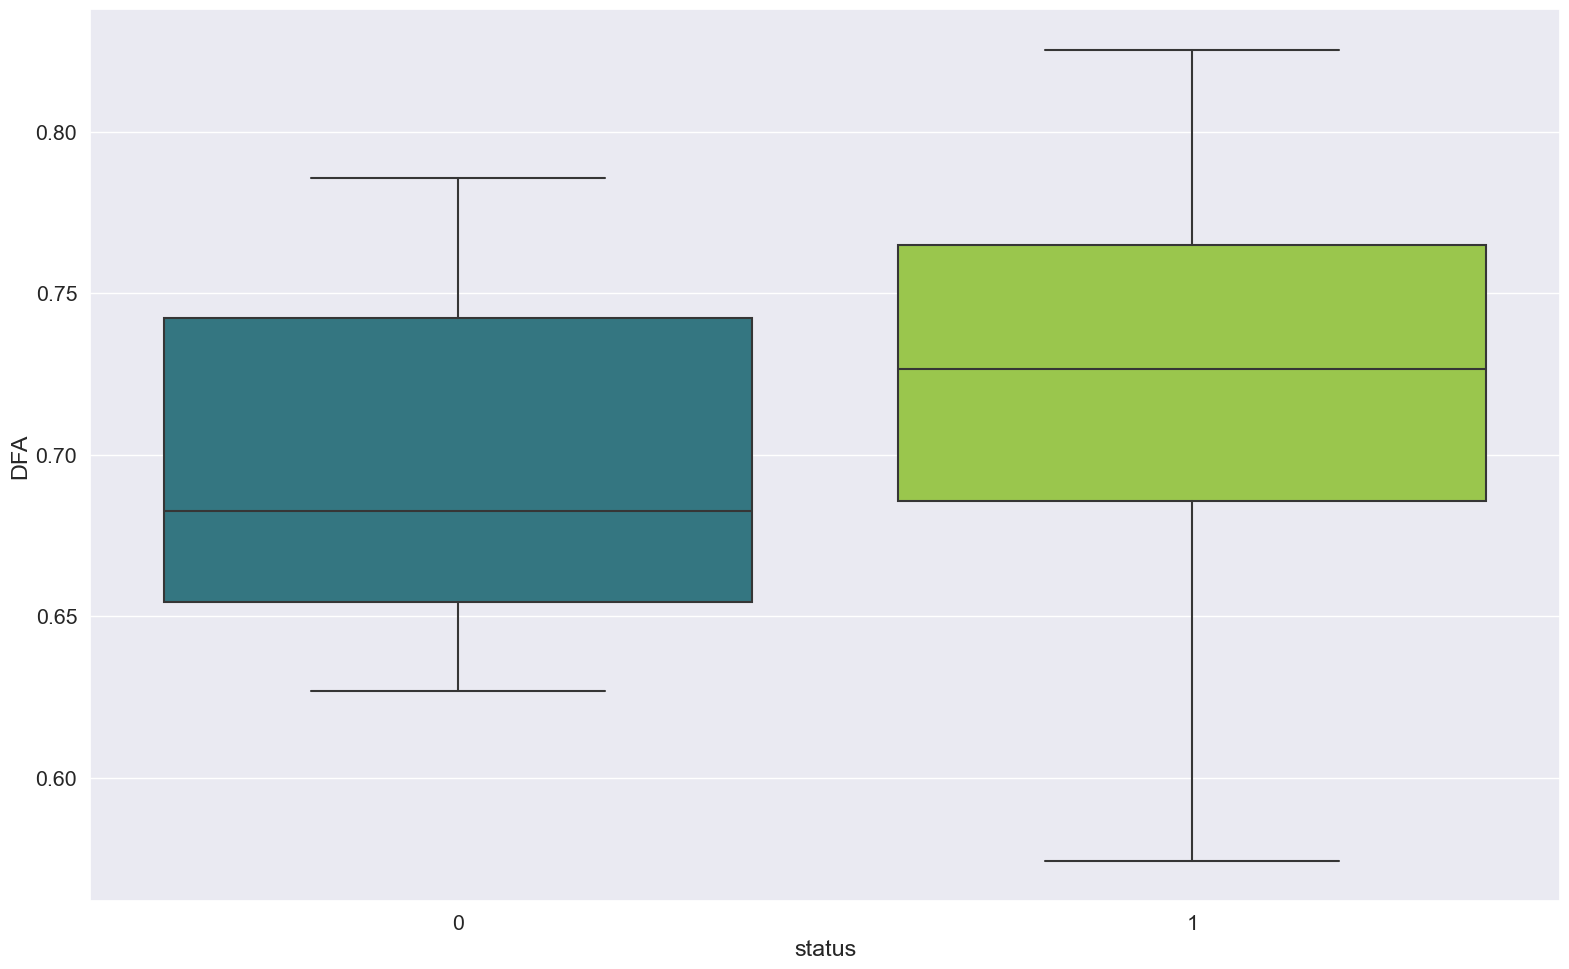

In [36]:
fig, ax = plt.subplots(1,1,figsize=(16,10)) 
sns.boxplot(x=data['status'],y=data['DFA'],palette=palette[2:7:3]) 
plt.tight_layout()
plt.show()

No outliers.

# Health status of the subject 
status

In [37]:
pd.DataFrame(data[data.columns].corr()['status'])

,status
status,1.000000
MDVP:Fo(Hz),-0.383535
MDVP:Fhi(Hz),-0.166136
MDVP:Flo(Hz),-0.380200
MDVP:Jitter(%),0.278220
MDVP:Jitter(Abs),0.338653
MDVP:RAP,0.266668
MDVP:PPQ,0.288698
Jitter:DDP,0.266646
MDVP:Shimmer,0.367430


There is medium to high correlation between the independent variable and the dependent ones.

# Splitting the data into training and testing 

In [445]:
#We need to separate the actual data (X) and the target (y) 'status'.
X=data.iloc[::,1:]
y=data.iloc[::,0:1]

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=117)

# Scaling, fitting and transforming the data

In [40]:
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

# Classification models

LogisticRegression

DecisionTreeClassifier

Support Vector Machine (SVM)

KNeighborsClassifier

Gaussian Naive-Bayes (GaussianNB)

# Logistic Regression

In [41]:
LR_model = LogisticRegression(solver="liblinear",random_state=117).fit(X_train,y_train)
y_predict_LR = LR_model.predict(X_test)
LR_model_score = LR_model.score(X_test, y_test)
print(round(LR_model_score,2))

0.81


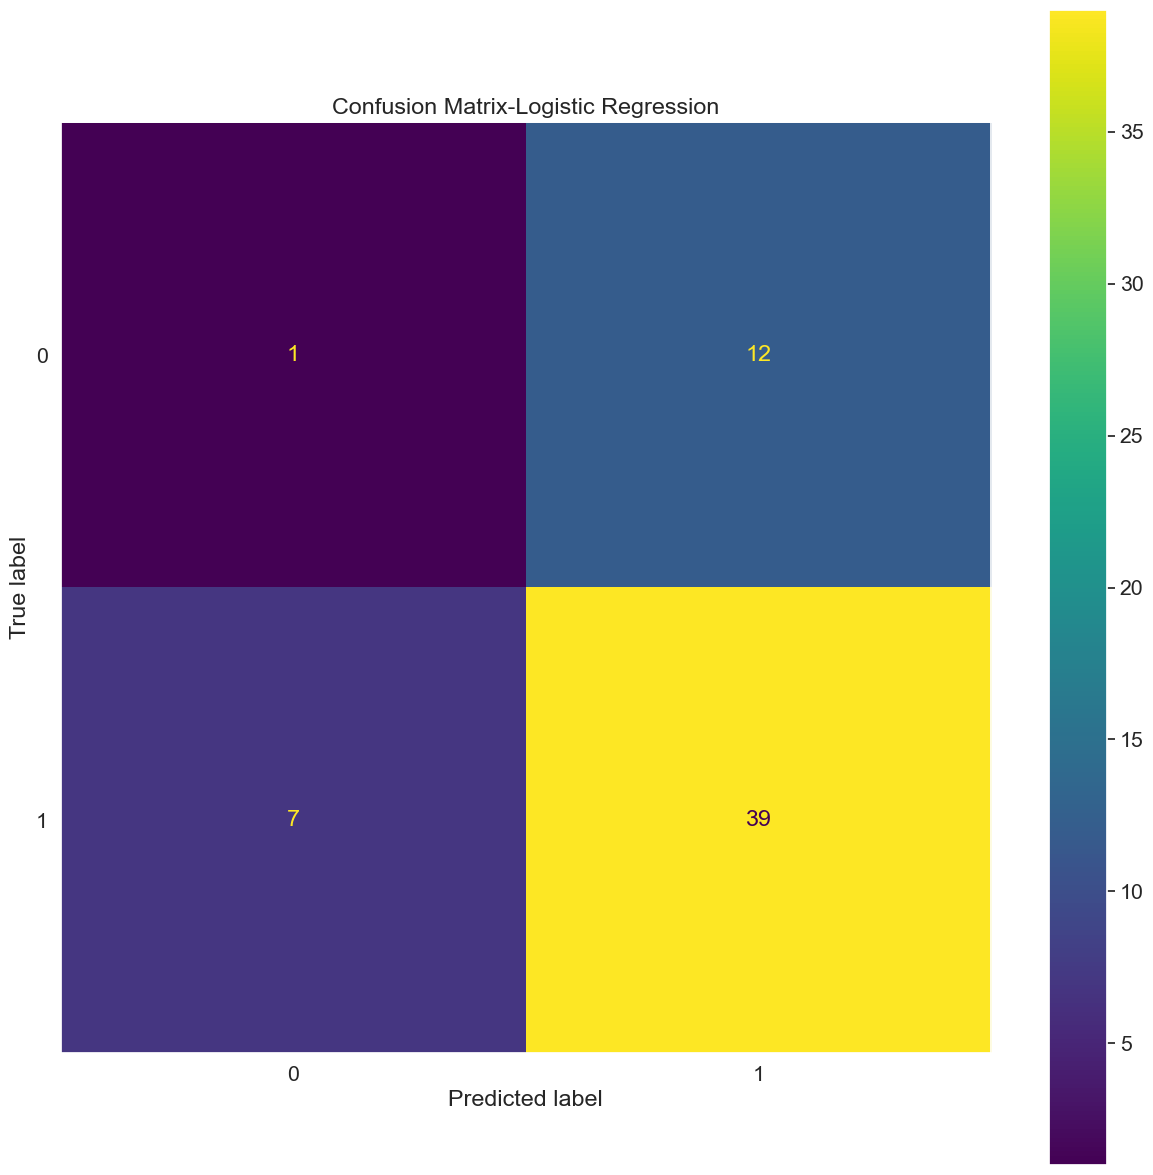

In [564]:
plt.rcParams["figure.figsize"] = (15,15)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_LR,cmap='viridis')
plt.title('Confusion Matrix-Logistic Regression')
plt.grid(False)
plt.show()

# Decision Tree

In [43]:
tree_model=DecisionTreeClassifier(max_depth=6).fit(X_train,y_train)
y_predict_tree=tree_model.predict(X_test)
tree_model_score = tree_model.score(X_test, y_test)
print(round(tree_model_score,2))

0.76


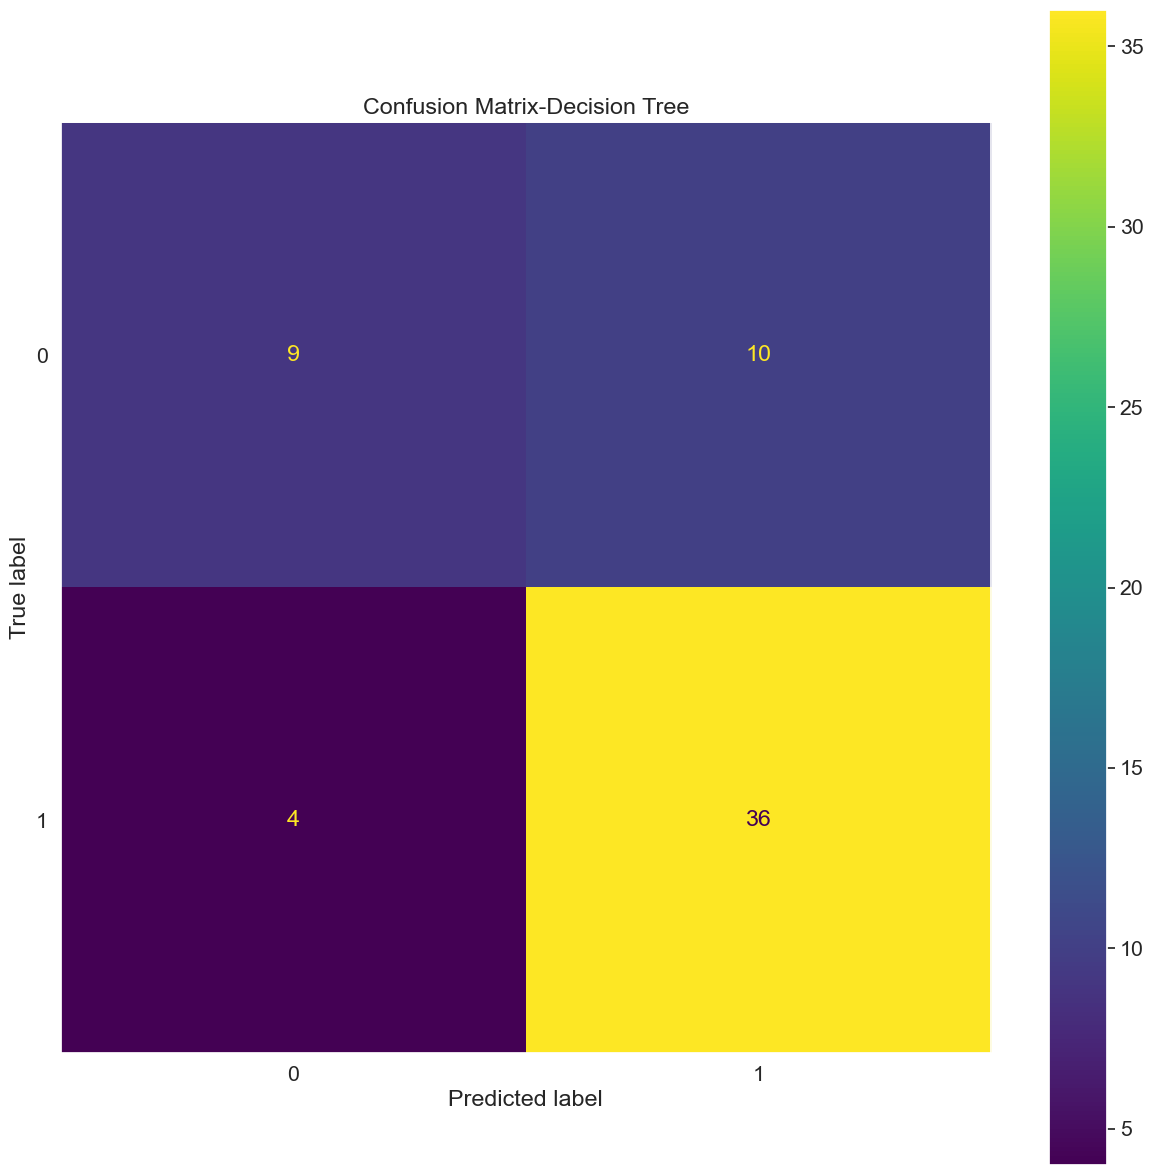

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_tree,cmap='viridis')
plt.title('Confusion Matrix-Decision Tree')
plt.grid(False)
plt.show()

# Support Vector Machine

In [45]:
svm_model=SVC().fit(X_train,y_train)
y_predict_svm=svm_model.predict(X_test)
svm_model_score=svm_model.score(X_test,y_test)
print(round(svm_model_score,2))

0.83


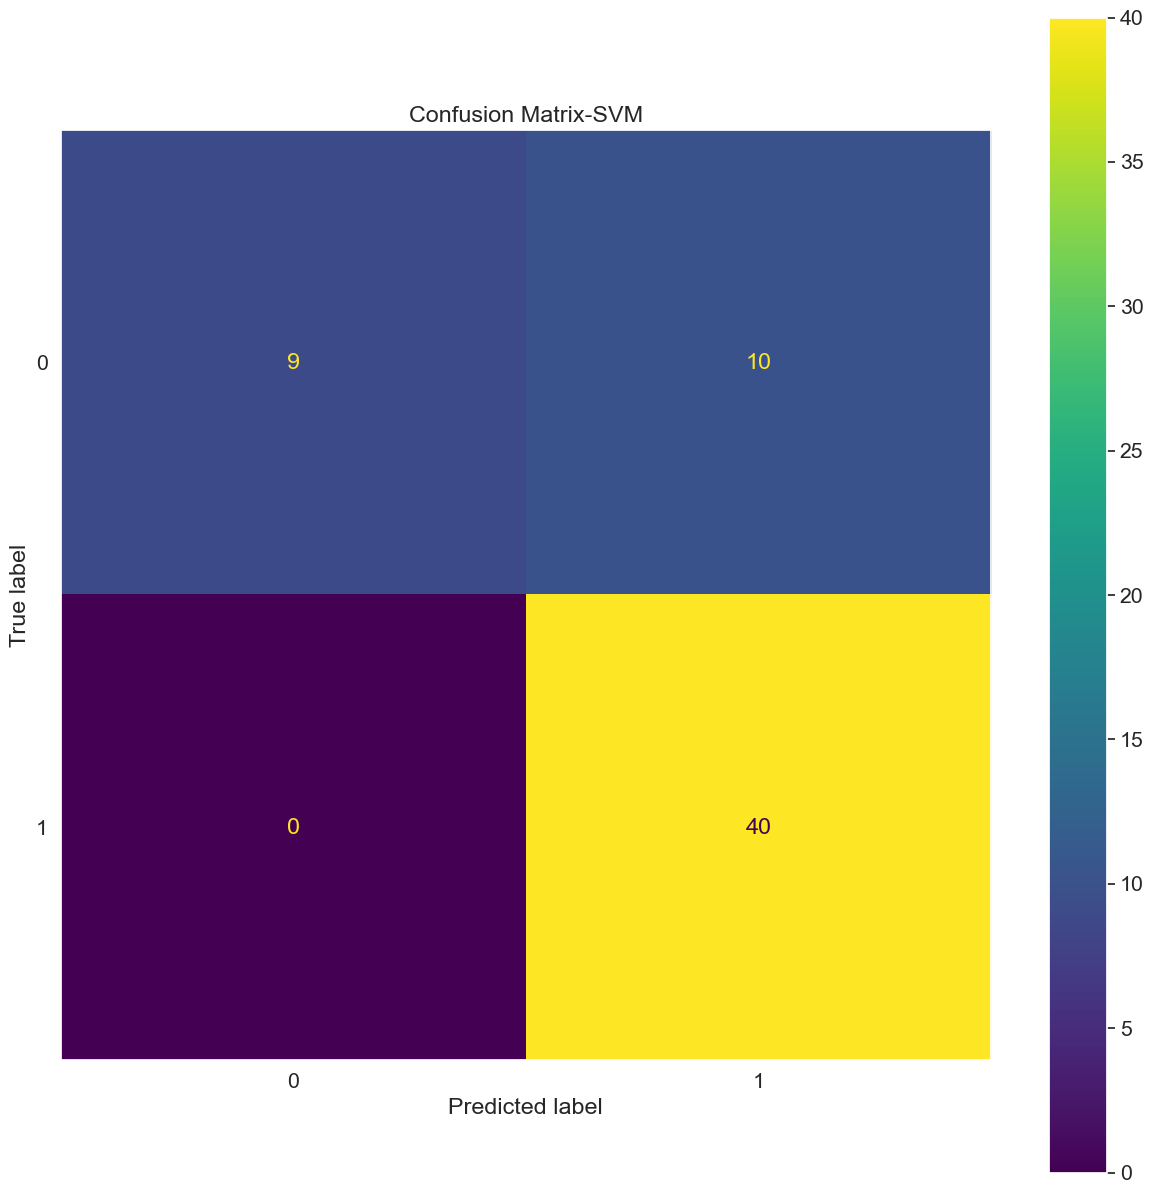

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_svm,cmap='viridis')
plt.title('Confusion Matrix-SVM')
plt.grid(False)
plt.show()

# KNeighbors

In [47]:
neighbor_model=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_predict_neighbor=neighbor_model.predict(X_test)
neighbor_model_score=neighbor_model.score(X_test,y_test)
print(round(neighbor_model_score,2))

0.8


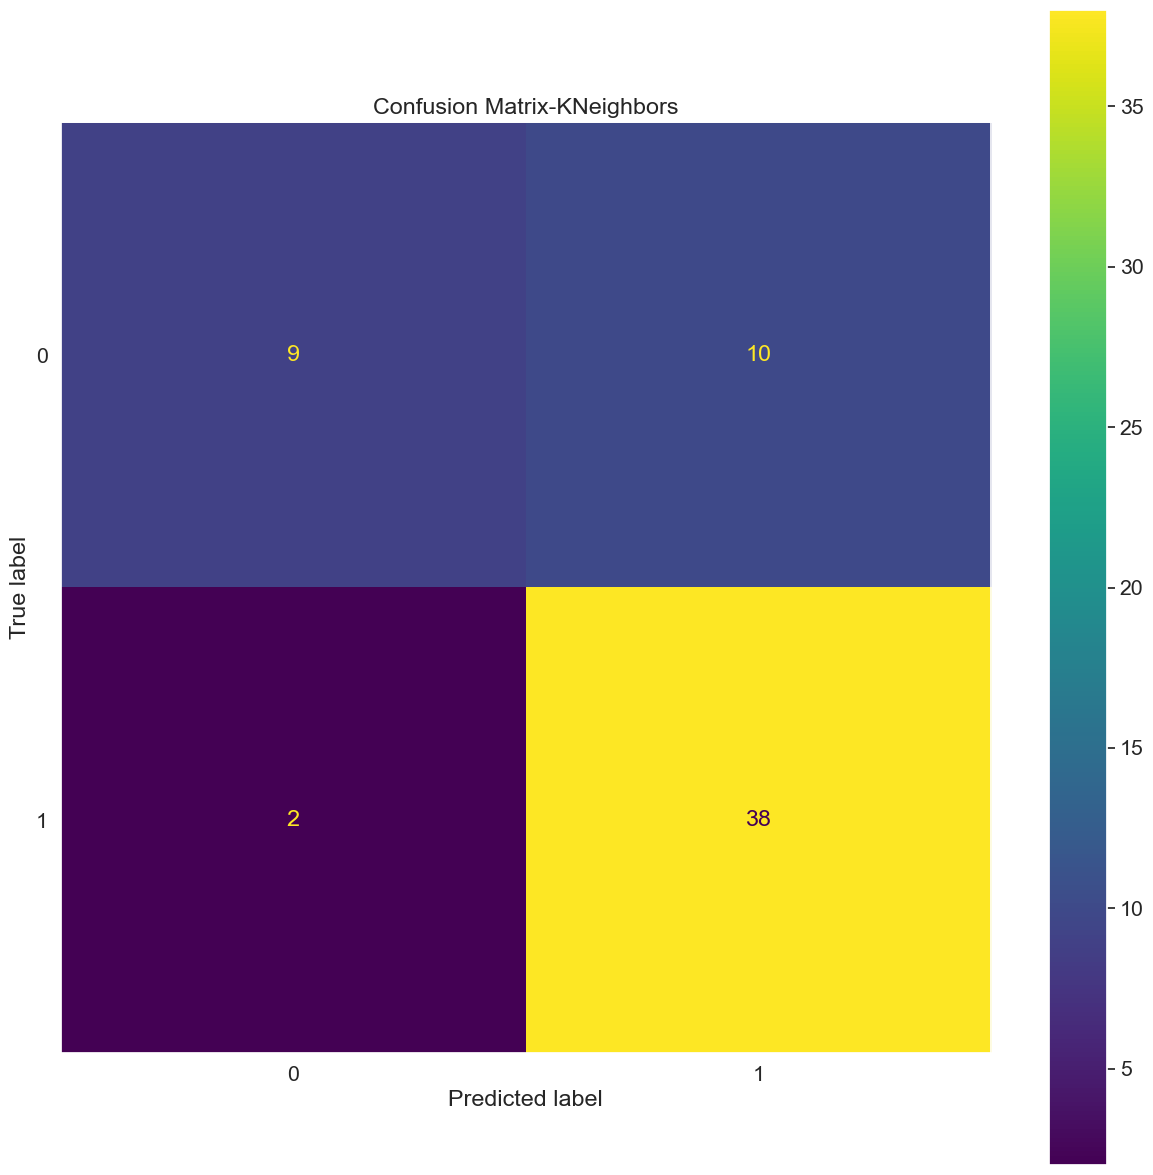

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_neighbor,cmap='viridis')
plt.title('Confusion Matrix-KNeighbors')
plt.grid(False)
plt.show()

# Gaussian Naive-Bayes

In [49]:
GaussianNB_model = GaussianNB().fit(X_train, y_train)
y_predict_GaussianNB=GaussianNB_model.predict(X_test)
GaussianNB_model_score=GaussianNB_model.score(X_test,y_test)
print(round(GaussianNB_model_score,2))

0.76


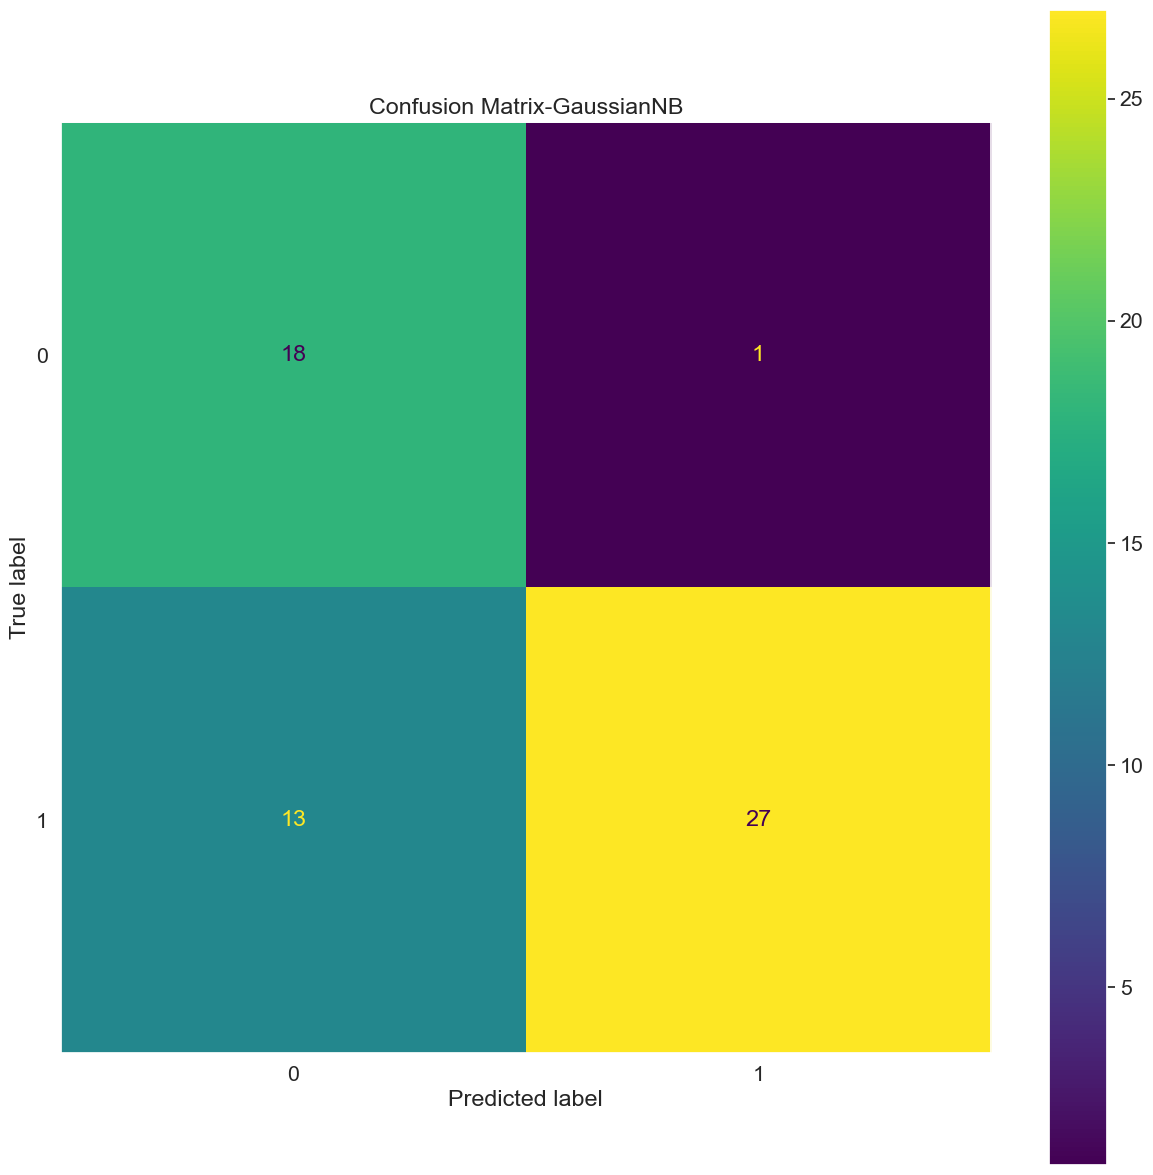

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_GaussianNB,cmap='viridis')
plt.title('Confusion Matrix-GaussianNB')
plt.grid(False)
plt.show()

# Random Forest

In [51]:
RF_model = RandomForestClassifier(n_estimators = 100,random_state=117) 
RF_model = RF_model.fit(X_train, y_train)
y_predict_rf = RF_model.predict(X_test)
RF_model_score=RF_model.score(X_test, y_test)
print(round(RF_model_score,2))

0.81


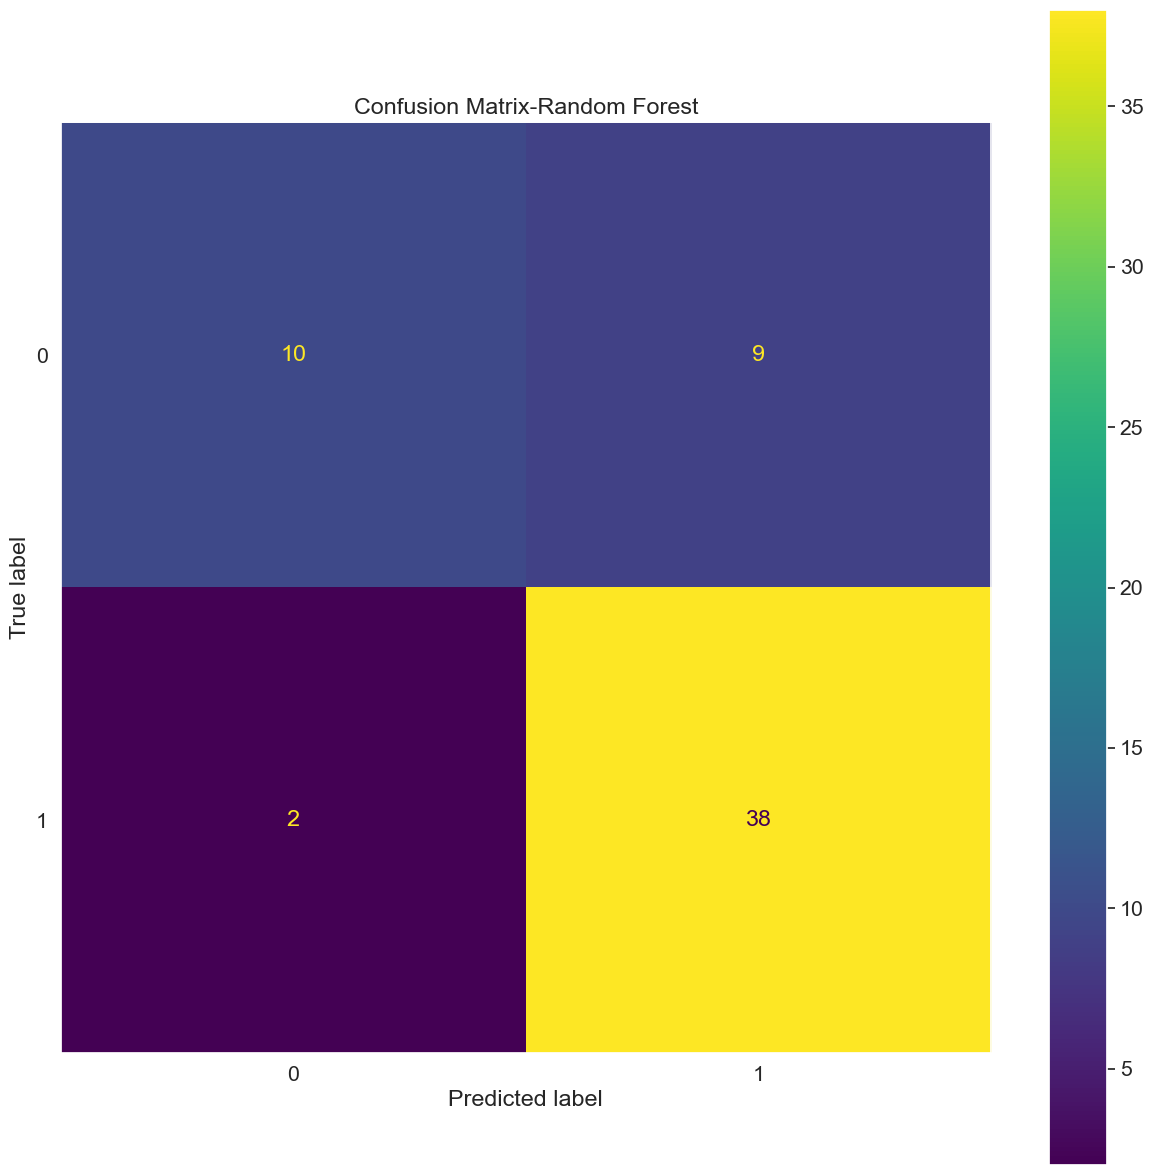

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_rf,cmap='viridis')
plt.title('Confusion Matrix-Random Forest')
plt.grid(False)
plt.show()

# XGBoost Classifier

In [53]:
XGBC_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=4,random_state=117)
XGBC_model = XGBC_model.fit(X_train, y_train)
y_predict_XGB = XGBC_model.predict(X_test)
XGBC_model_score=accuracy_score(y_test, y_predict_XGB)
print(round(XGBC_model_score,2))

0.8


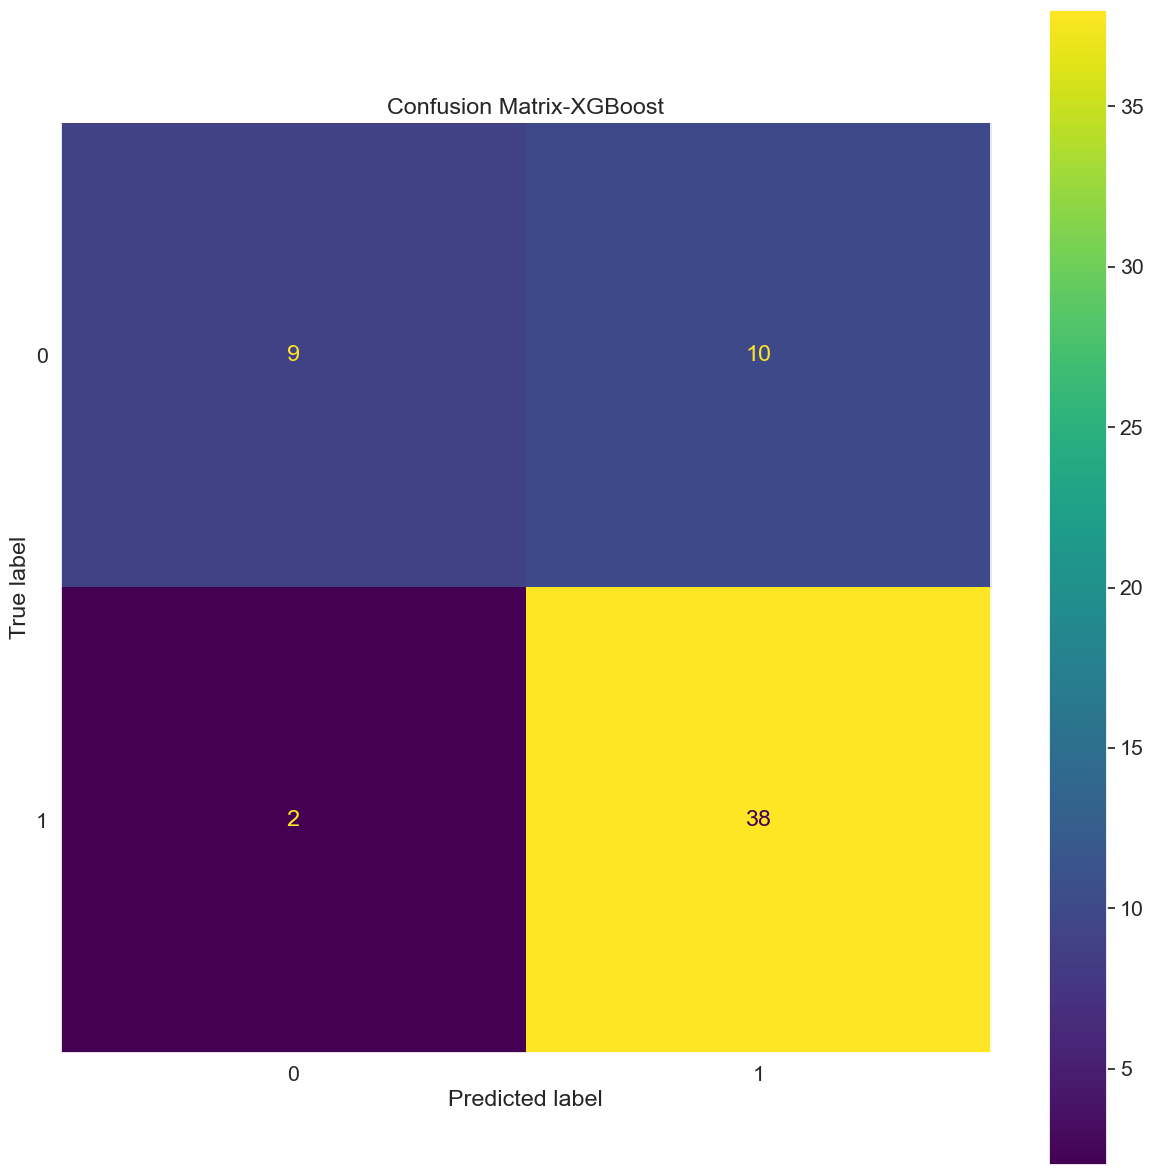

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_XGB,cmap='viridis')
plt.title('Confusion Matrix-XGBoost')
plt.grid(False)
plt.show()

In [827]:
pdata=data

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(pdata,2))

,variables,VIF
0,status,7.088918
1,MDVP:Fo(Hz),53.518297
2,MDVP:Fhi(Hz),8.795329
3,MDVP:Flo(Hz),17.257065
4,MDVP:Jitter(%),7.607233
5,MDVP:Jitter(Abs),NaN
6,MDVP:RAP,6.262228
7,MDVP:PPQ,6.428414
8,Jitter:DDP,17.730525
9,MDVP:Shimmer,127.969986


In [828]:
pdata=pdata.drop(['DFA','MDVP:Jitter(Abs)','status'],axis=1)

In [829]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fo(Hz),43.626409
1,MDVP:Fhi(Hz),8.414154
2,MDVP:Flo(Hz),16.429654
3,MDVP:Jitter(%),7.287722
4,MDVP:RAP,6.188621
5,MDVP:PPQ,6.264600
6,Jitter:DDP,17.151583
7,MDVP:Shimmer,127.960825
8,MDVP:Shimmer(dB),176.304571
9,Shimmer:APQ3,50.830237


In [830]:
pdata=pdata.drop(['MDVP:Shimmer(dB)'],axis=1)

In [831]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fo(Hz),43.194146
1,MDVP:Fhi(Hz),7.962432
2,MDVP:Flo(Hz),16.426496
3,MDVP:Jitter(%),6.667610
4,MDVP:RAP,6.187031
5,MDVP:PPQ,6.151562
6,Jitter:DDP,17.051612
7,MDVP:Shimmer,118.494107
8,Shimmer:APQ3,50.804885
9,Shimmer:APQ5,44.088002


In [832]:
pdata=pdata.drop(['spread1'],axis=1)

In [833]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fo(Hz),40.175919
1,MDVP:Fhi(Hz),7.956904
2,MDVP:Flo(Hz),16.277148
3,MDVP:Jitter(%),6.656769
4,MDVP:RAP,6.130688
5,MDVP:PPQ,6.075147
6,Jitter:DDP,16.932969
7,MDVP:Shimmer,117.733896
8,Shimmer:APQ3,50.542305
9,Shimmer:APQ5,43.857223


In [834]:
pdata=pdata.drop(['MDVP:Shimmer'],axis=1)

In [835]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fo(Hz),40.163989
1,MDVP:Fhi(Hz),7.951209
2,MDVP:Flo(Hz),16.266414
3,MDVP:Jitter(%),6.642326
4,MDVP:RAP,6.115798
5,MDVP:PPQ,6.069395
6,Jitter:DDP,16.890740
7,Shimmer:APQ3,50.542274
8,Shimmer:APQ5,36.679690
9,MDVP:APQ,21.204750


In [837]:
pdata=pdata.drop(['Shimmer:DDA'],axis=1)

KeyError: "['Shimmer:DDA'] not found in axis"

In [838]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fo(Hz),39.318321
1,MDVP:Fhi(Hz),7.860067
2,MDVP:Flo(Hz),16.168026
3,MDVP:Jitter(%),6.642309
4,MDVP:RAP,5.911985
5,MDVP:PPQ,6.061705
6,Jitter:DDP,15.759393
7,Shimmer:APQ3,24.938627
8,Shimmer:APQ5,31.999859
9,MDVP:APQ,20.943276


In [839]:
pdata=pdata.drop(['RPDE'],axis=1)

In [840]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fo(Hz),39.313398
1,MDVP:Fhi(Hz),7.837041
2,MDVP:Flo(Hz),16.148993
3,MDVP:Jitter(%),6.538551
4,MDVP:RAP,5.897503
5,MDVP:PPQ,5.327802
6,Jitter:DDP,15.686505
7,Shimmer:APQ3,23.826536
8,Shimmer:APQ5,31.793061
9,MDVP:APQ,20.856977


In [841]:
pdata=pdata.drop(['HNR','Shimmer:APQ5'],axis=1)

In [842]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fo(Hz),39.080493
1,MDVP:Fhi(Hz),7.592161
2,MDVP:Flo(Hz),14.469048
3,MDVP:Jitter(%),6.407996
4,MDVP:RAP,5.870941
5,MDVP:PPQ,4.930288
6,Jitter:DDP,15.646328
7,Shimmer:APQ3,15.752505
8,MDVP:APQ,14.530119
9,NHR,6.862416


In [843]:
pdata=pdata.drop(['MDVP:Fo(Hz)','D2'],axis=1)

In [844]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fhi(Hz),5.380805
1,MDVP:Flo(Hz),5.458103
2,MDVP:Jitter(%),6.119140
3,MDVP:RAP,5.842191
4,MDVP:PPQ,4.127481
5,Jitter:DDP,15.418978
6,Shimmer:APQ3,14.880813
7,MDVP:APQ,14.214544
8,NHR,6.600110
9,spread2,15.270743


In [845]:
pdata=pdata.drop(['PPE'],axis=1)

In [846]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fhi(Hz),5.376627
1,MDVP:Flo(Hz),5.450866
2,MDVP:Jitter(%),5.432308
3,MDVP:RAP,5.694104
4,MDVP:PPQ,3.950577
5,Jitter:DDP,14.285509
6,Shimmer:APQ3,14.783441
7,MDVP:APQ,13.878160
8,NHR,5.992937
9,spread2,8.501820


In [847]:
pdata=pdata.drop(['Shimmer:APQ3','Jitter:DDP'],axis=1)

In [848]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fhi(Hz),5.269247
1,MDVP:Flo(Hz),5.313824
2,MDVP:Jitter(%),4.680998
3,MDVP:RAP,4.362311
4,MDVP:PPQ,3.948684
5,MDVP:APQ,7.240203
6,NHR,5.278017
7,spread2,8.244022


In [849]:
pdata.T

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
MDVP:Fhi(Hz),157.302000,148.65000,131.111000,137.871000,141.781000,131.162000,137.244000,113.840000,132.068000,120.103000,...,177.291000,592.03000,581.289000,119.167000,262.70700,230.978000,253.017000,240.005000,396.961000,260.277000
MDVP:Flo(Hz),74.997000,113.81900,111.555000,111.366000,110.655000,113.787000,114.820000,104.315000,91.754000,91.226000,...,96.983000,86.22800,94.246000,86.647000,78.22800,94.261000,89.488000,74.287000,74.904000,77.973000
MDVP:Jitter(%),0.007840,0.00968,0.010500,0.009970,0.012840,0.009680,0.003330,0.002900,0.005510,0.005320,...,0.003140,0.00496,0.002670,0.003270,0.00694,0.004590,0.005640,0.013600,0.007400,0.005670
MDVP:RAP,0.003700,0.00465,0.005440,0.005020,0.006550,0.004630,0.001550,0.001440,0.002930,0.002680,...,0.001340,0.00254,0.001150,0.001460,0.00412,0.002630,0.003310,0.006240,0.003700,0.002950
MDVP:PPQ,0.005540,0.00696,0.007810,0.006980,0.009080,0.007500,0.002020,0.001820,0.003320,0.003320,...,0.001920,0.00263,0.001480,0.001840,0.00396,0.002590,0.002920,0.005640,0.003900,0.003170
MDVP:APQ,0.029710,0.04368,0.035900,0.037720,0.044650,0.032430,0.013510,0.012560,0.017170,0.024440,...,0.016910,0.01491,0.011440,0.010950,0.01758,0.027450,0.018790,0.016670,0.015880,0.013730
NHR,0.022110,0.01929,0.013090,0.013530,0.017670,0.012220,0.006070,0.003440,0.010700,0.010220,...,0.007370,0.01397,0.006800,0.007030,0.04441,0.027640,0.018100,0.107150,0.072230,0.043980
spread2,0.266482,0.33559,0.311173,0.334147,0.234513,0.299111,0.257682,0.183721,0.327769,0.325996,...,0.133917,0.15331,0.116636,0.149694,0.15989,0.121952,0.129303,0.158453,0.207454,0.190667


In [765]:
X_train, X_test, y_train, y_test=train_test_split(pdata,y,test_size=0.30,random_state=0)
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

# BEST RESULT

In [766]:
RF_model = RandomForestClassifier(n_estimators = 100,random_state=6) 
RF_model = RF_model.fit(X_train, y_train)
y_predict_rf = RF_model.predict(X_test)
RF_model_score=RF_model.score(X_test, y_test)
print(round(RF_model_score,2))

0.9


In [767]:
print(metrics.classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.93      0.93      0.93        46

    accuracy                           0.90        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.90      0.90      0.90        59



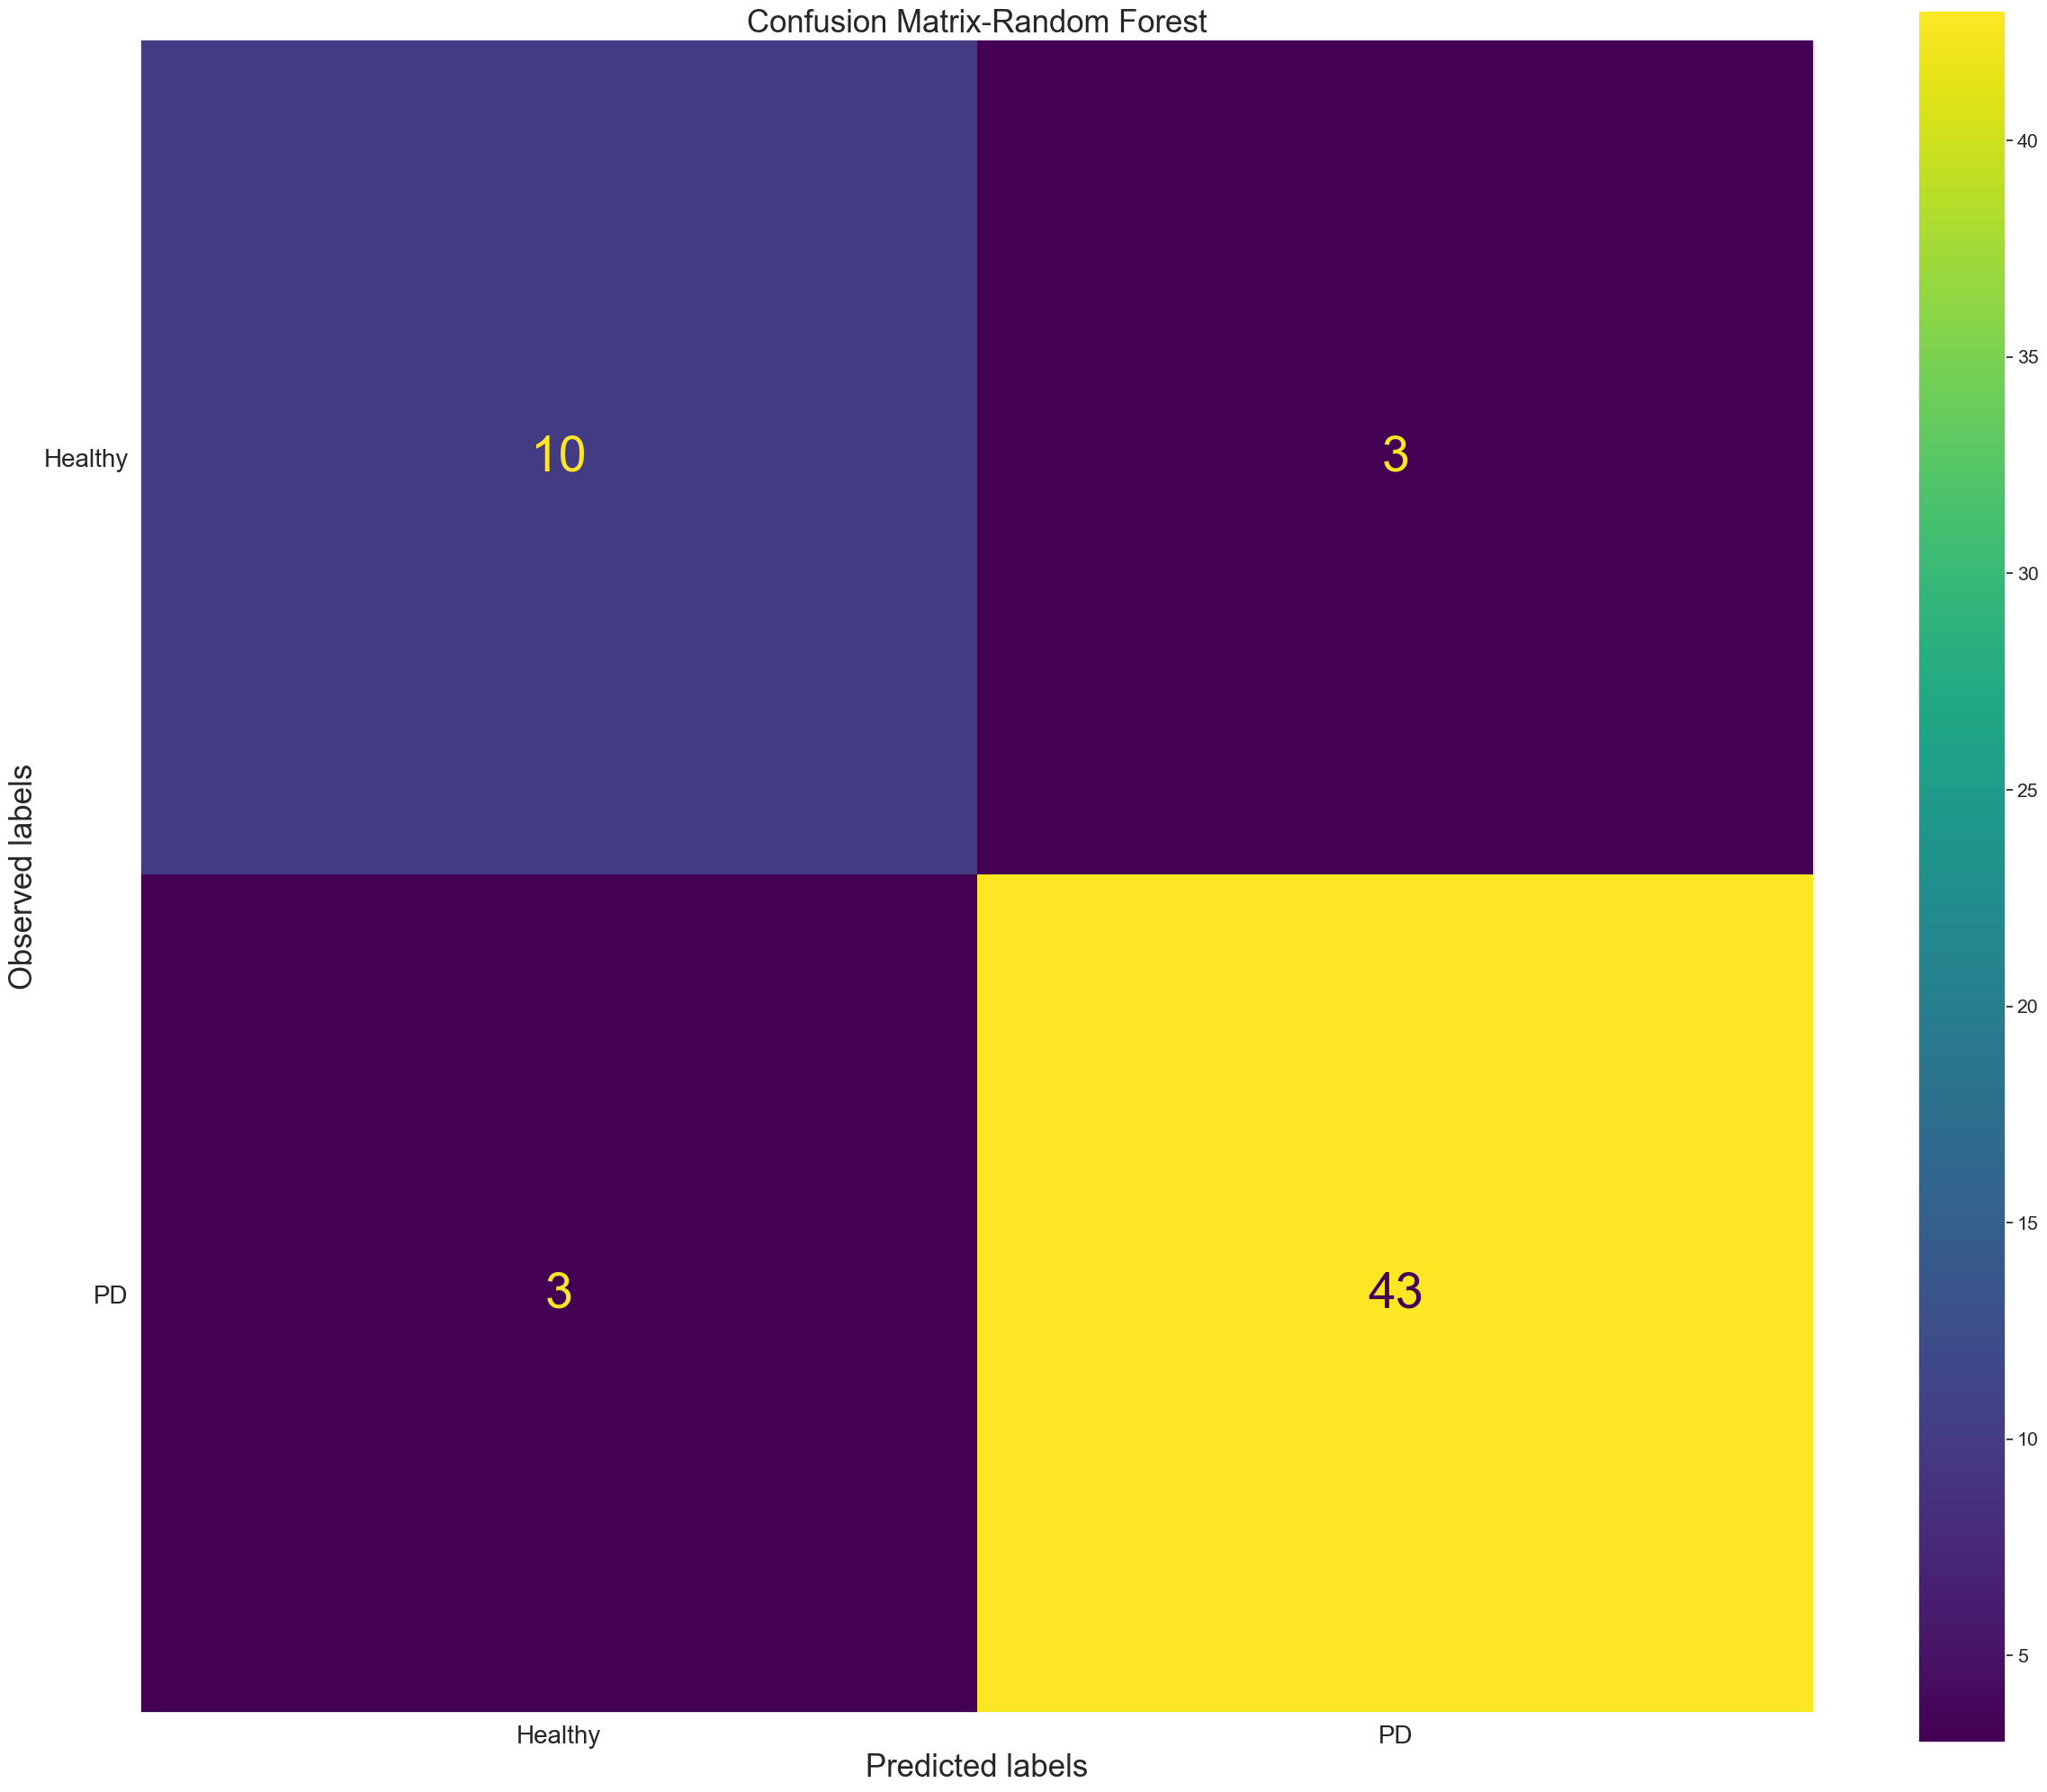

In [768]:
plt.rcParams.update({'font.size': 40})
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_rf,cmap='viridis',display_labels=['Healthy', 'PD'])
plt.title('Confusion Matrix-Random Forest',fontdict=title_font)
plt.grid(False)
label_font = {'size':'25'}  # Adjust to fit
plt.xlabel('Predicted labels', fontdict=label_font);
plt.ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'25'}  # Adjust to fit

plt.tick_params(axis='both', which='major', labelsize=20)  # Adjust to fit
plt.show()

In [769]:
data_monitoring=pd.read_csv('parkinsons_updrs.data')

In [826]:
pdata

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,MDVP:APQ,NHR,spread2
0,157.302,74.997,0.00784,0.00370,0.00554,0.02971,0.02211,0.266482
1,148.650,113.819,0.00968,0.00465,0.00696,0.04368,0.01929,0.335590
2,131.111,111.555,0.01050,0.00544,0.00781,0.03590,0.01309,0.311173
3,137.871,111.366,0.00997,0.00502,0.00698,0.03772,0.01353,0.334147
4,141.781,110.655,0.01284,0.00655,0.00908,0.04465,0.01767,0.234513
...,...,...,...,...,...,...,...,...
190,230.978,94.261,0.00459,0.00263,0.00259,0.02745,0.02764,0.121952
191,253.017,89.488,0.00564,0.00331,0.00292,0.01879,0.01810,0.129303
192,240.005,74.287,0.01360,0.00624,0.00564,0.01667,0.10715,0.158453
193,396.961,74.904,0.00740,0.00370,0.00390,0.01588,0.07223,0.207454


In [881]:
testing_data=pdata.iloc[1:,::]

In [882]:
pdata.iloc[1:,::]

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,MDVP:APQ,NHR,spread2
1,148.650,113.819,0.00968,0.00465,0.00696,0.04368,0.01929,0.335590
2,131.111,111.555,0.01050,0.00544,0.00781,0.03590,0.01309,0.311173
3,137.871,111.366,0.00997,0.00502,0.00698,0.03772,0.01353,0.334147
4,141.781,110.655,0.01284,0.00655,0.00908,0.04465,0.01767,0.234513
5,131.162,113.787,0.00968,0.00463,0.00750,0.03243,0.01222,0.299111
...,...,...,...,...,...,...,...,...
190,230.978,94.261,0.00459,0.00263,0.00259,0.02745,0.02764,0.121952
191,253.017,89.488,0.00564,0.00331,0.00292,0.01879,0.01810,0.129303
192,240.005,74.287,0.01360,0.00624,0.00564,0.01667,0.10715,0.158453
193,396.961,74.904,0.00740,0.00370,0.00390,0.01588,0.07223,0.207454


In [883]:
y=data.iloc[::,0:1]
testing_y=y.iloc[1:,::]

In [884]:
X_train, X_test, y_train, y_test=train_test_split(testing_data,testing_y,test_size=0.30,random_state=0)
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [888]:
RF_model = RandomForestClassifier(n_estimators = 100,random_state=117) 
RF_model = RF_model.fit(X_train, y_train)
y_predict_rf = RF_model.predict(X_test)
RF_model_score=RF_model.score(X_test, y_test)
print(round(RF_model_score,2))

0.92


In [889]:
y_prediction=RF_model.predict(X_test)
y_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [903]:
pd.concat([y.iloc[:1,::],pdata.iloc[:1,::]],axis=1)

,status,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,MDVP:APQ,NHR,spread2
0,1,157.302,74.997,0.00784,0.0037,0.00554,0.02971,0.02211,0.266482


In [891]:
New_patient_entry=pdata.iloc[:1,::].values.tolist()

In [897]:
New_patient_entry

[[157.302, 74.997, 0.00784, 0.0037, 0.00554, 0.02971, 0.02211, 0.266482]]

In [899]:
Final_prediction = RF_model.predict(New_patient_entry)
print(Final_prediction)

[1]


In [894]:
Final_prediction

array([1], dtype=int64)

In [895]:
y.iloc[:1,::]

,status
0,1


In [566]:
GaussianNB_model = GaussianNB().fit(X_train, y_train)
y_predict_GaussianNB=GaussianNB_model.predict(X_test)
GaussianNB_model_score=GaussianNB_model.score(X_test,y_test)
print(round(GaussianNB_model_score,2))

0.75


In [567]:
neighbor_model=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_predict_neighbor=neighbor_model.predict(X_test)
neighbor_model_score=neighbor_model.score(X_test,y_test)
print(round(neighbor_model_score,2))

0.86


In [603]:
svm_model=SVC(random_state=0).fit(X_train,y_train)
y_predict_svm=svm_model.predict(X_test)
svm_model_score=svm_model.score(X_test,y_test)
print(round(svm_model_score,2))

0.9


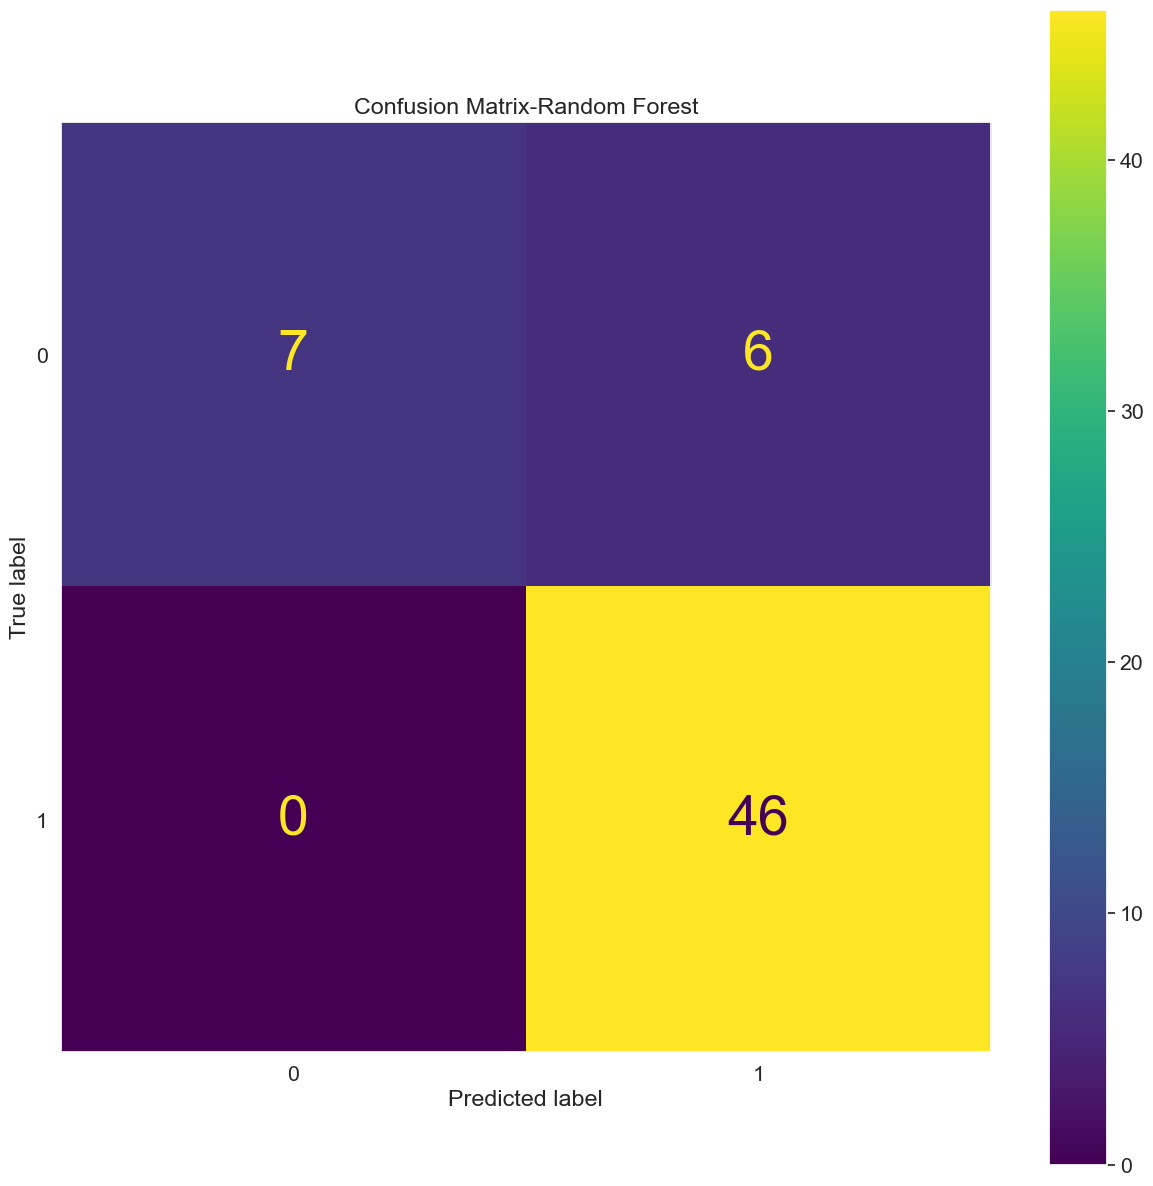

In [604]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_svm,cmap='viridis')
plt.title('Confusion Matrix-Random Forest')
plt.grid(False)
plt.show()

In [569]:
tree_model=DecisionTreeClassifier(max_depth=6,random_state=117).fit(X_train,y_train)
y_predict_tree=tree_model.predict(X_test)
tree_model_score = tree_model.score(X_test, y_test)
print(round(tree_model_score,2))

0.81


In [570]:
LR_model = LogisticRegression(solver="liblinear",random_state=117).fit(X_train,y_train)
y_predict_LR = LR_model.predict(X_test)
LR_model_score = LR_model.score(X_test, y_test)
print(round(LR_model_score,2))

0.88


In [571]:
XGBC_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=4,random_state=0)
XGBC_model = XGBC_model.fit(X_train, y_train)
y_predict_XGB = XGBC_model.predict(X_test)
XGBC_model_score=accuracy_score(y_test, y_predict_XGB)
print(round(XGBC_model_score,2))

0.9


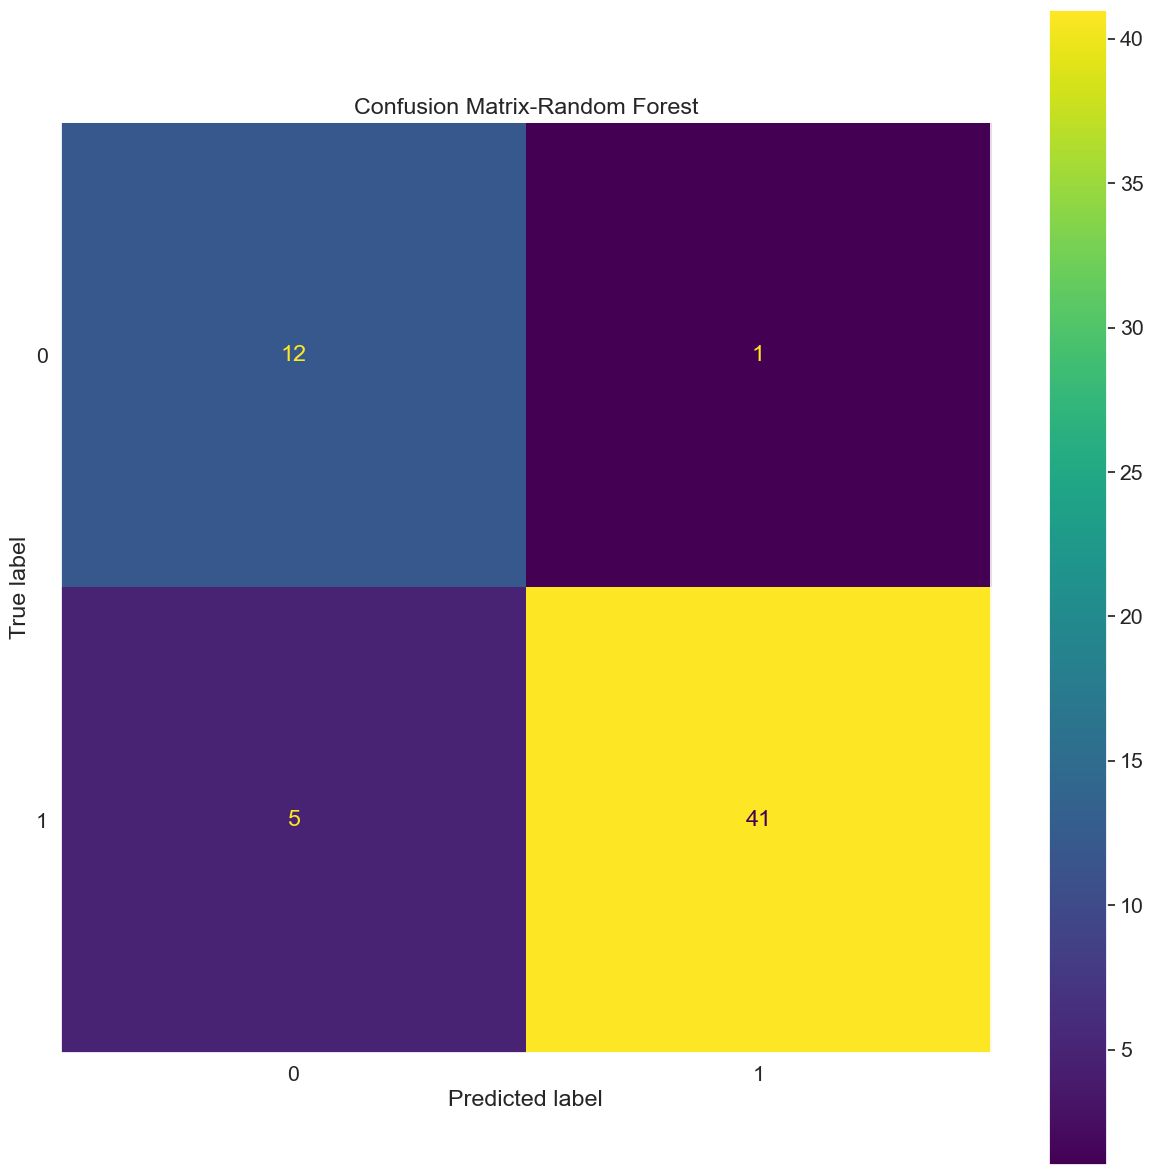

In [574]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_XGB,cmap='viridis')
plt.title('Confusion Matrix-Random Forest')
plt.grid(False)
plt.show()

In [572]:
ABC = AdaBoostClassifier(n_estimators=50, random_state=117)
ABC = ABC.fit(X_train, y_train)
y_predict_ABC = ABC.predict(X_test)
ABC_score=ABC.score(X_test , y_test)
print(round(ABC.score(X_test , y_test),2))

0.73


# PCA

In [749]:
X=data.iloc[::,1:]

In [750]:
scaled_data=StandardScaler().fit_transform(X)
pca=PCA(n_components=22)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [751]:
x_pca

array([[ 2.09661430e+00, -1.55060712e+00, -1.26506987e+00, ...,
         7.19267332e-02,  5.47533264e-04,  2.49051436e-04],
       [ 4.70933096e+00, -1.33459335e+00, -1.05765361e+00, ...,
         8.14047690e-03,  6.78537477e-04, -1.99319081e-04],
       [ 3.85261522e+00, -1.42622131e+00, -1.82496468e+00, ...,
         4.99272487e-02, -7.82058986e-04,  1.94217880e-04],
       ...,
       [ 1.00137166e+00,  1.92549131e+00, -3.61748786e-01, ...,
        -3.74717136e-02, -5.54148684e-04,  1.14365156e-04],
       [-6.15342805e-01,  2.09038987e+00,  8.23242182e-01, ...,
         2.53718394e-02,  8.46306986e-04,  2.73482464e-04],
       [-1.15481622e+00,  1.26905513e+00,  1.10726350e+00, ...,
         3.82124920e-03, -4.73159355e-05, -4.31400381e-05]])

In [752]:
x_pca.shape

(195, 22)

In [753]:
 pca.components_.shape

(22, 22)

In [754]:
pca.explained_variance_

array([1.30249053e+01, 2.49868840e+00, 1.54997836e+00, 1.47253767e+00,
       9.78936281e-01, 7.32866704e-01, 5.55091514e-01, 3.64271393e-01,
       2.91332156e-01, 2.25281570e-01, 1.41289708e-01, 1.05381751e-01,
       7.00963977e-02, 3.83630140e-02, 2.21251552e-02, 1.78792269e-02,
       1.25206061e-02, 7.25132208e-03, 3.51459094e-03, 1.09054801e-03,
       3.63699743e-07, 3.32945826e-08])

In [755]:
weights = pca.components_*np.sqrt(pca.explained_variance_)

In [756]:
weights[0]

array([-1.92472166e-01,  1.06106119e-02, -7.94539865e-02,  3.08847145e-01,
        2.39121801e-01,  2.13868050e-01,  1.91125995e-01,  1.50777941e-01,
        1.40335501e-01,  1.24246707e-01,  9.52393635e-02,  8.19283707e-02,
        6.71526055e-02,  4.96272312e-02,  3.47926647e-02, -3.23663406e-02,
        1.64184802e-02,  3.49248027e-03,  1.32622665e-02,  4.97799637e-03,
        9.34280707e-05,  4.21613556e-05])

In [757]:
pca_recovered = np.dot(weights, X.T)

In [758]:
feature_weights = pca.components_

<BarContainer object of 22 artists>

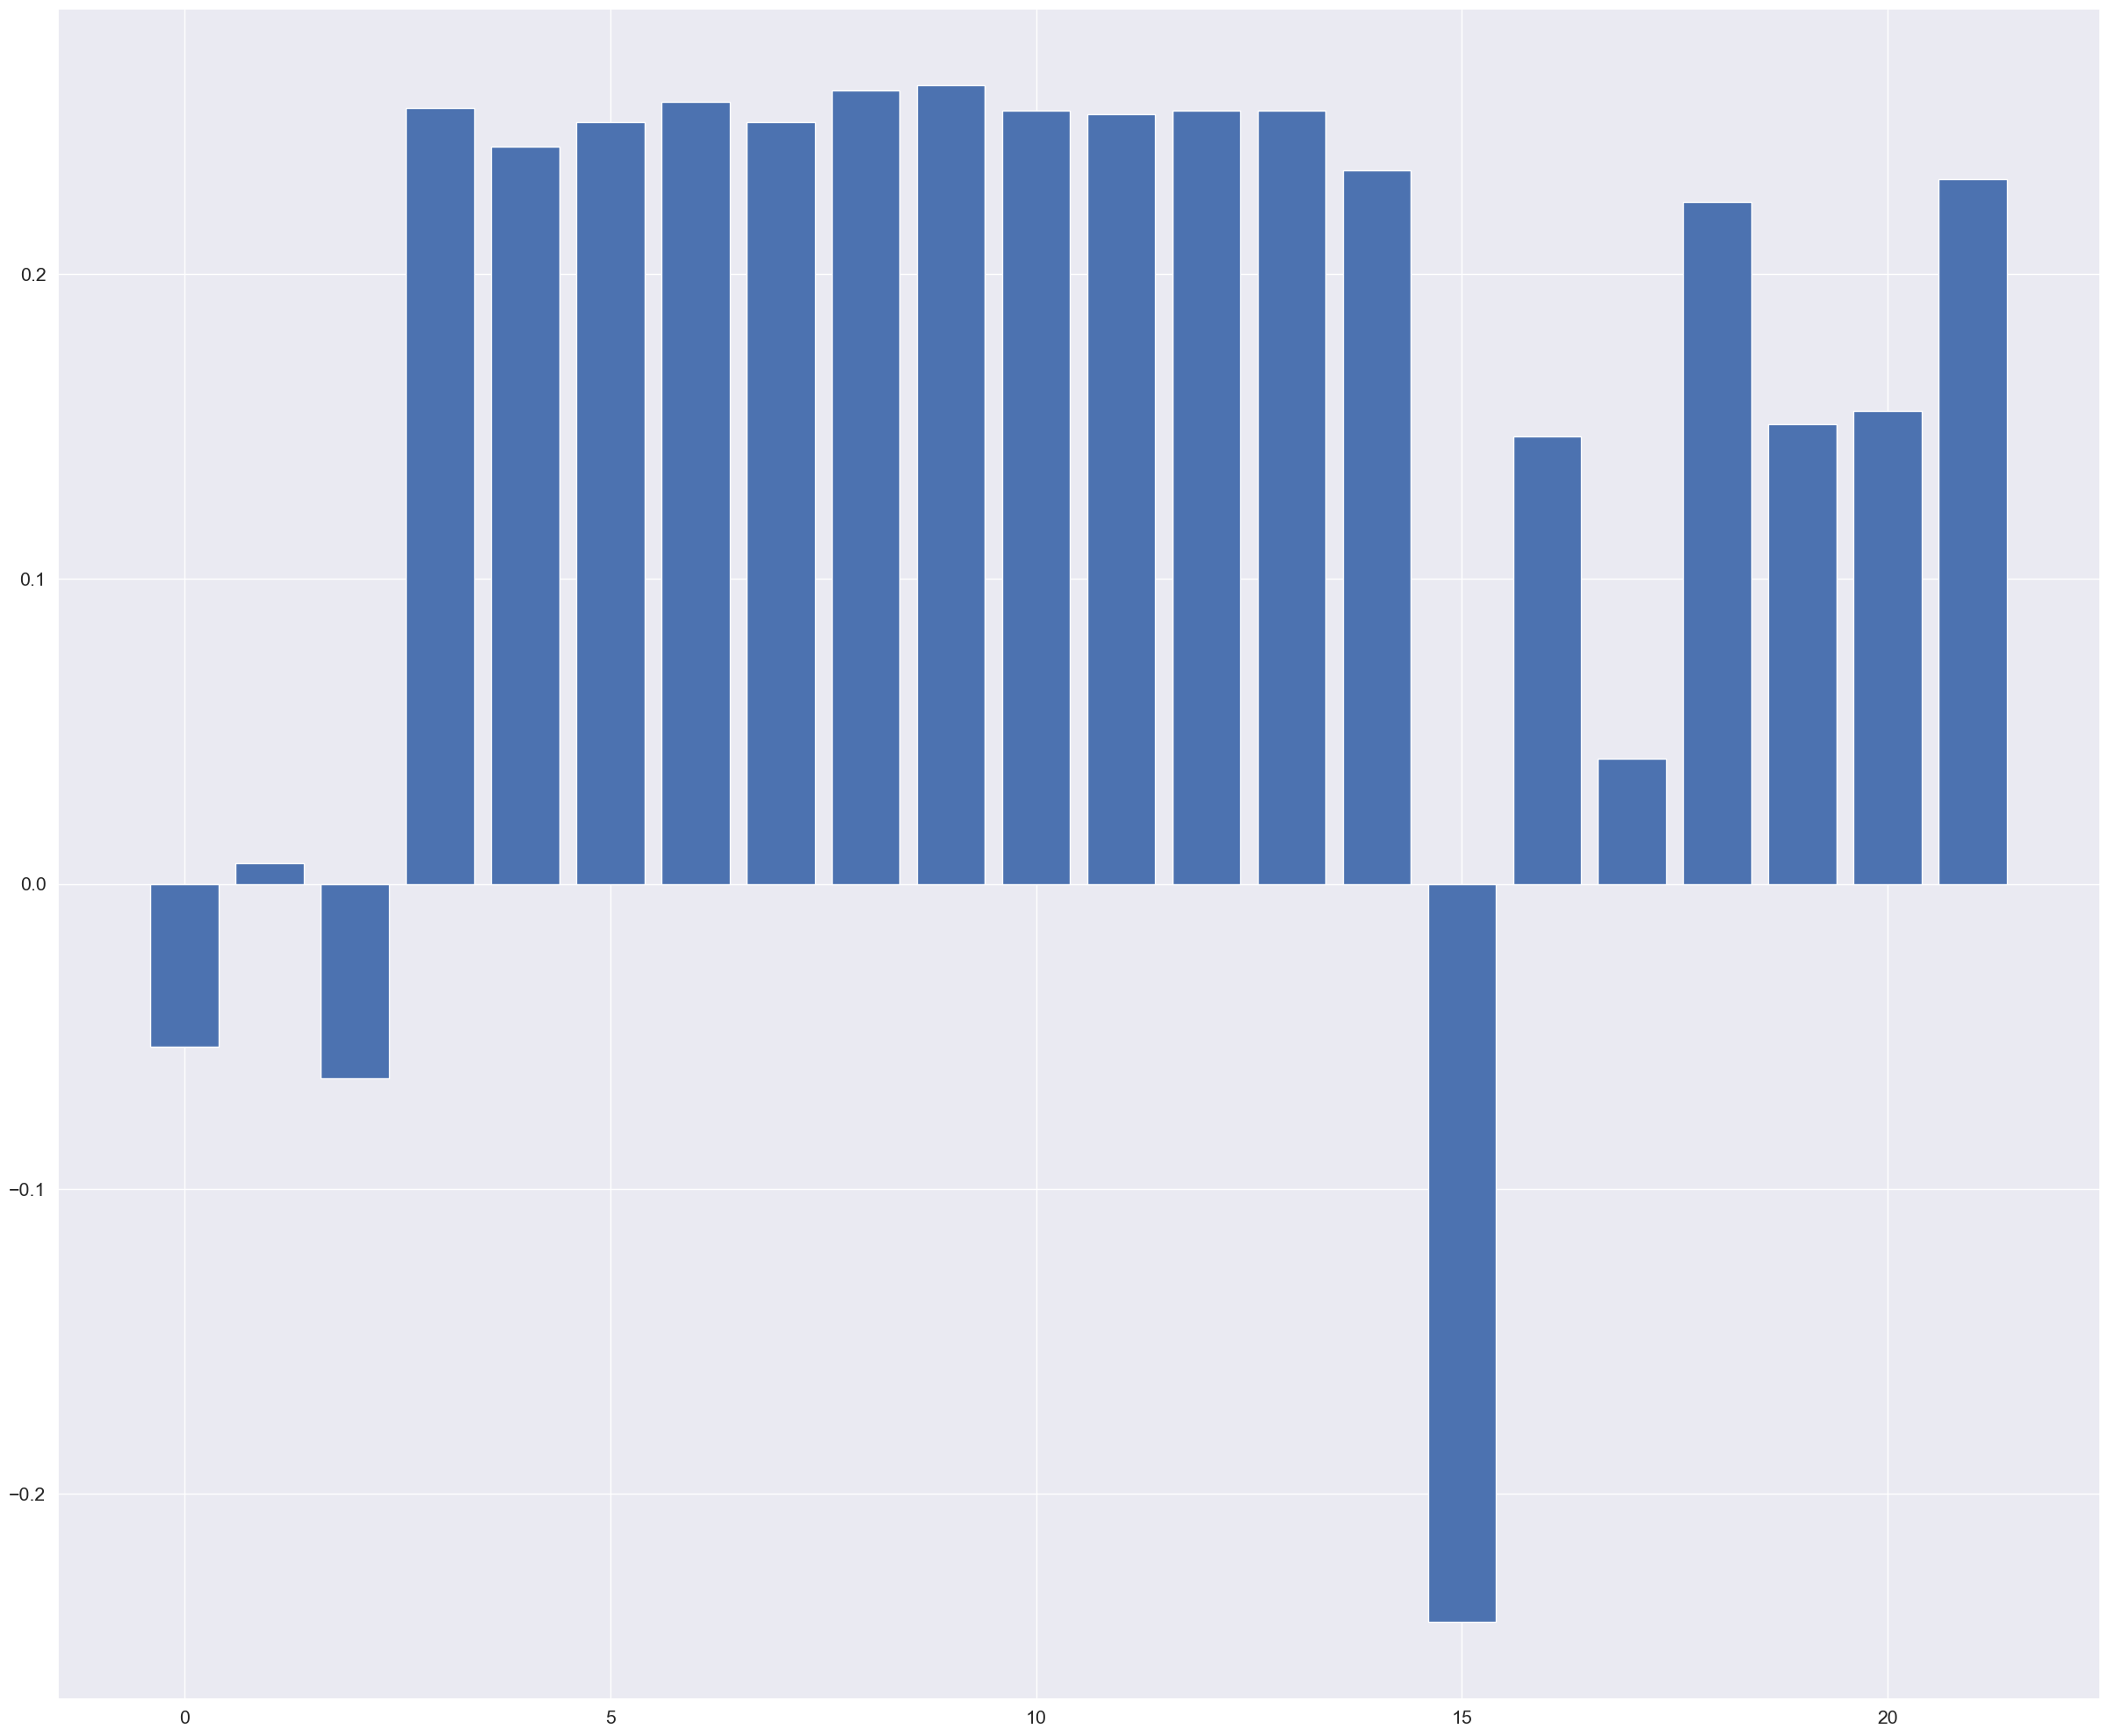

In [759]:
plt.bar(range(22),feature_weights[0])

In [761]:
PCA_df=pd.concat([pd.DataFrame(pca_recovered.T).iloc[::,3:5],pd.DataFrame(data.status)],axis=1)

In [762]:
PCA_df.columns=['Principal Component 1','Principal Component 2', 'status' ]

In [763]:
PCA_df.sample(10)

,Principal Component 1,Principal Component 2,status
190,-20.210404,-174.744685,0
39,-59.009645,-200.067138,1
161,-32.304076,-126.868977,1
36,-56.594172,-191.333960,1
106,-50.292659,-164.842401,1
119,-39.409890,-193.356673,1
145,-29.113968,-202.611910,1
174,-27.534983,-127.491993,0
110,-34.110978,-182.172101,1
181,-47.663468,-160.408148,1


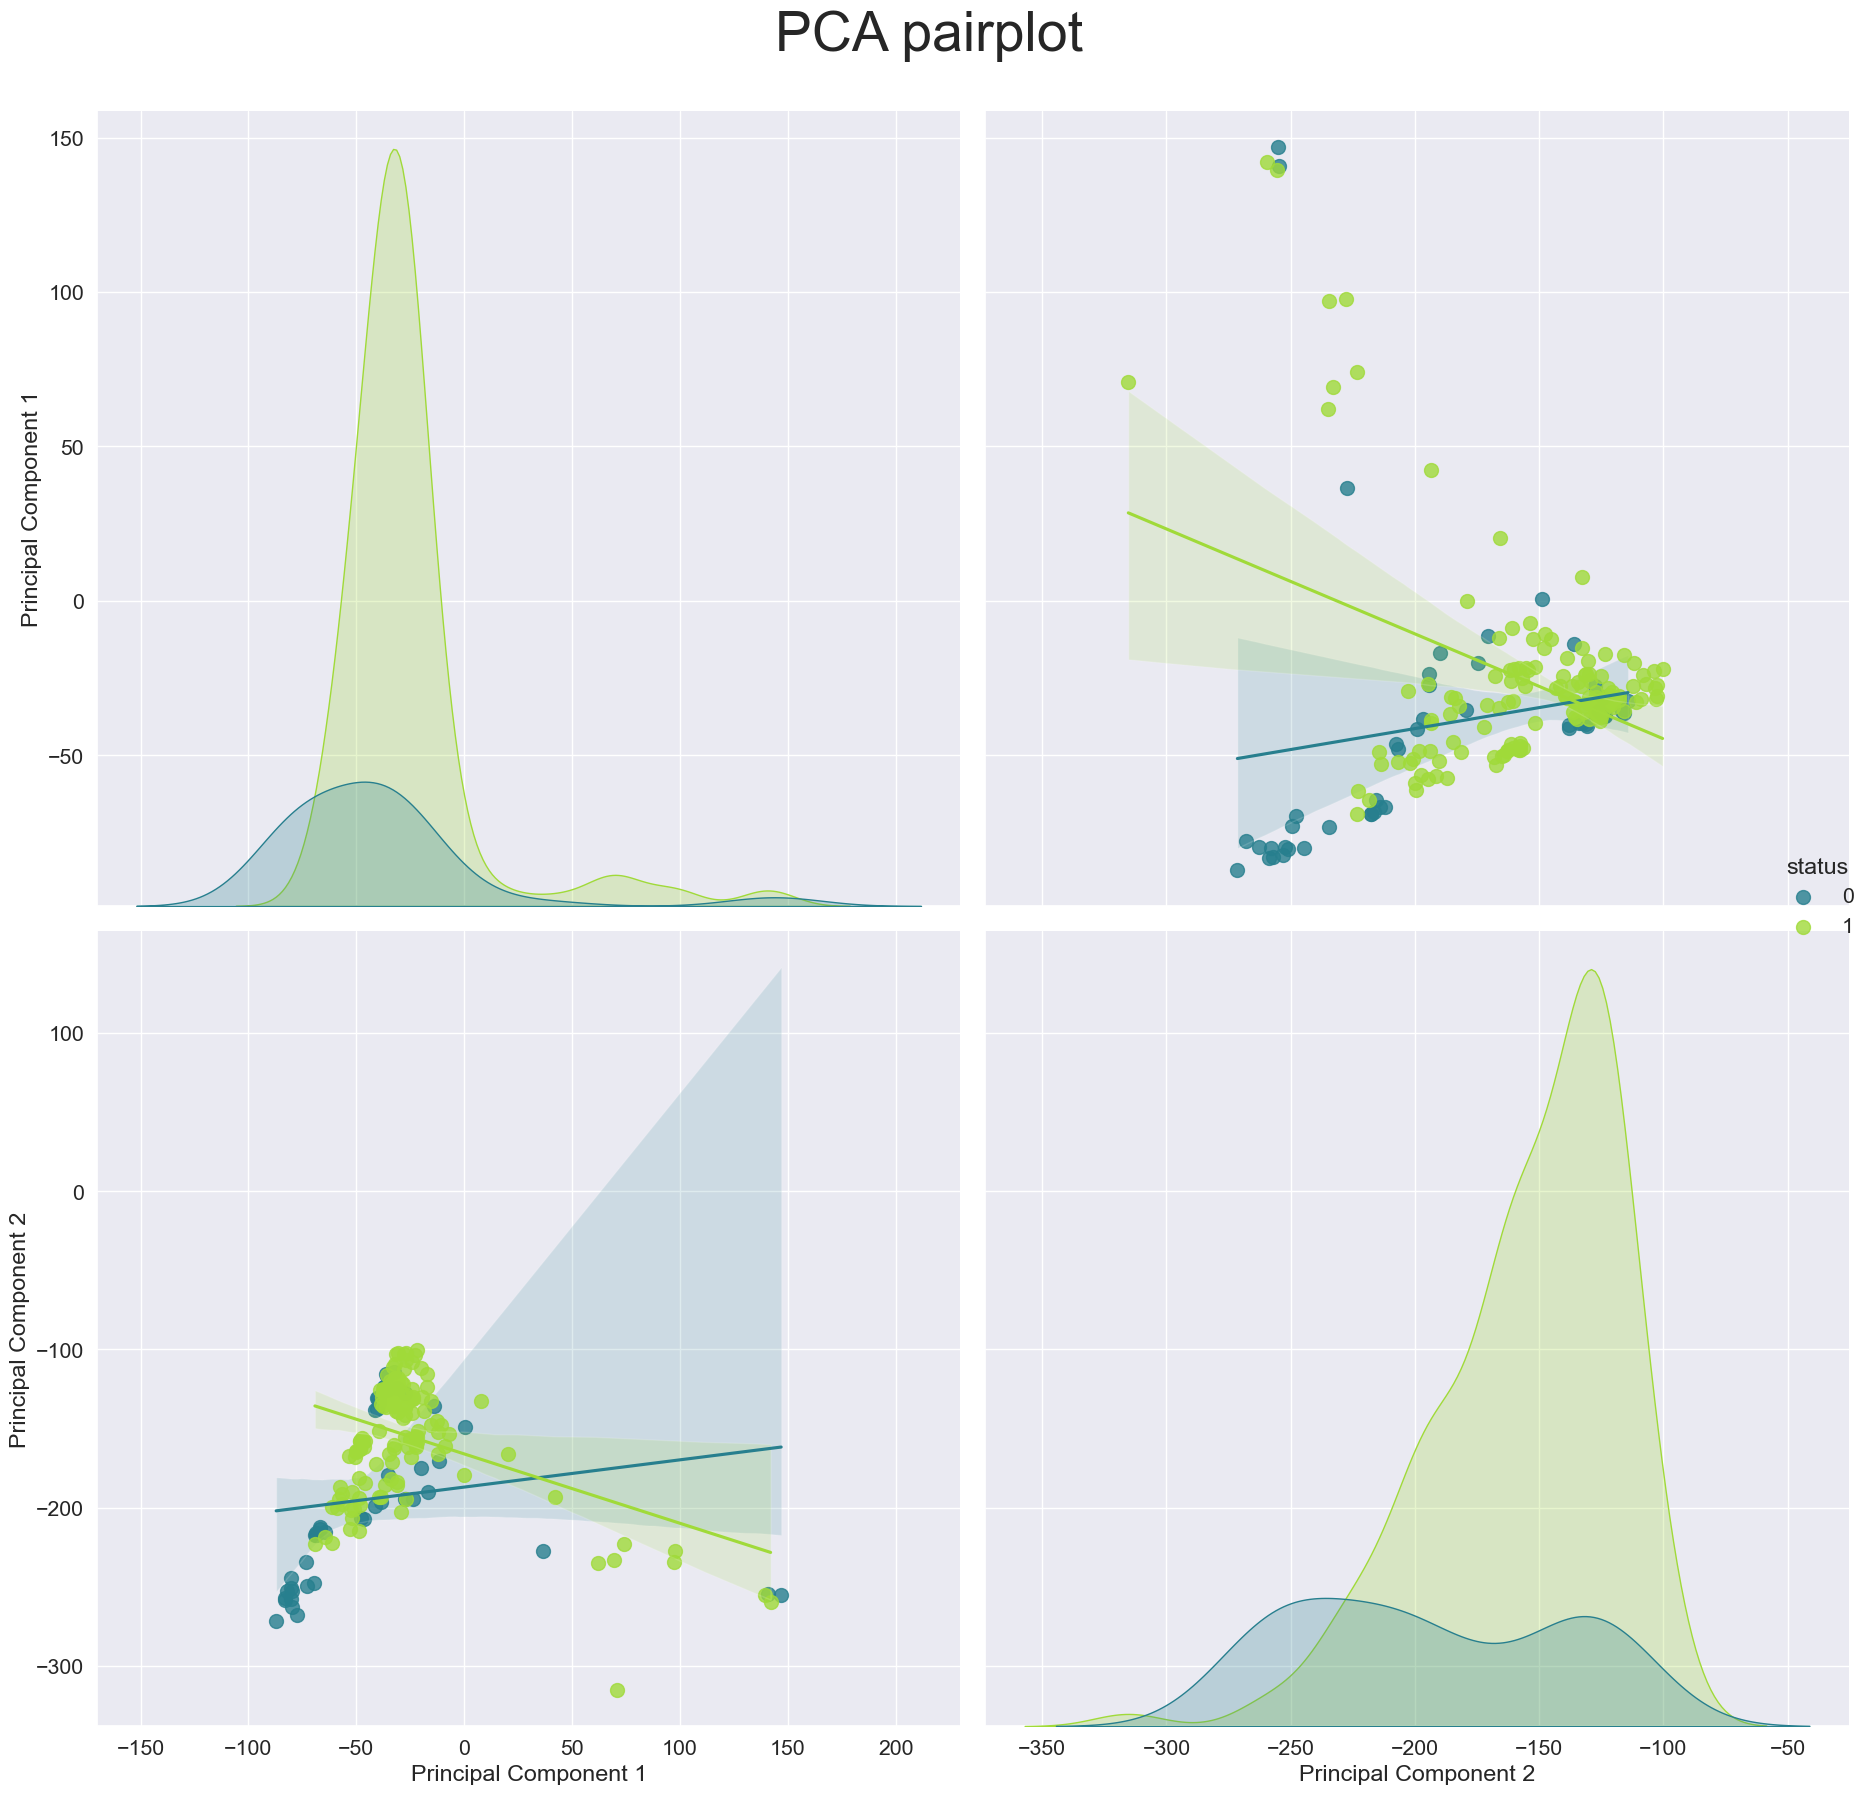

In [764]:
g=sns.pairplot(data=PCA_df,hue='status',kind='reg',palette=palette[2:7:3],
               height=9,plot_kws=dict(scatter_kws=dict(s=100)))
g.fig.suptitle("PCA pairplot",x=0.5, y=1,fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='1', ylabel='status'>

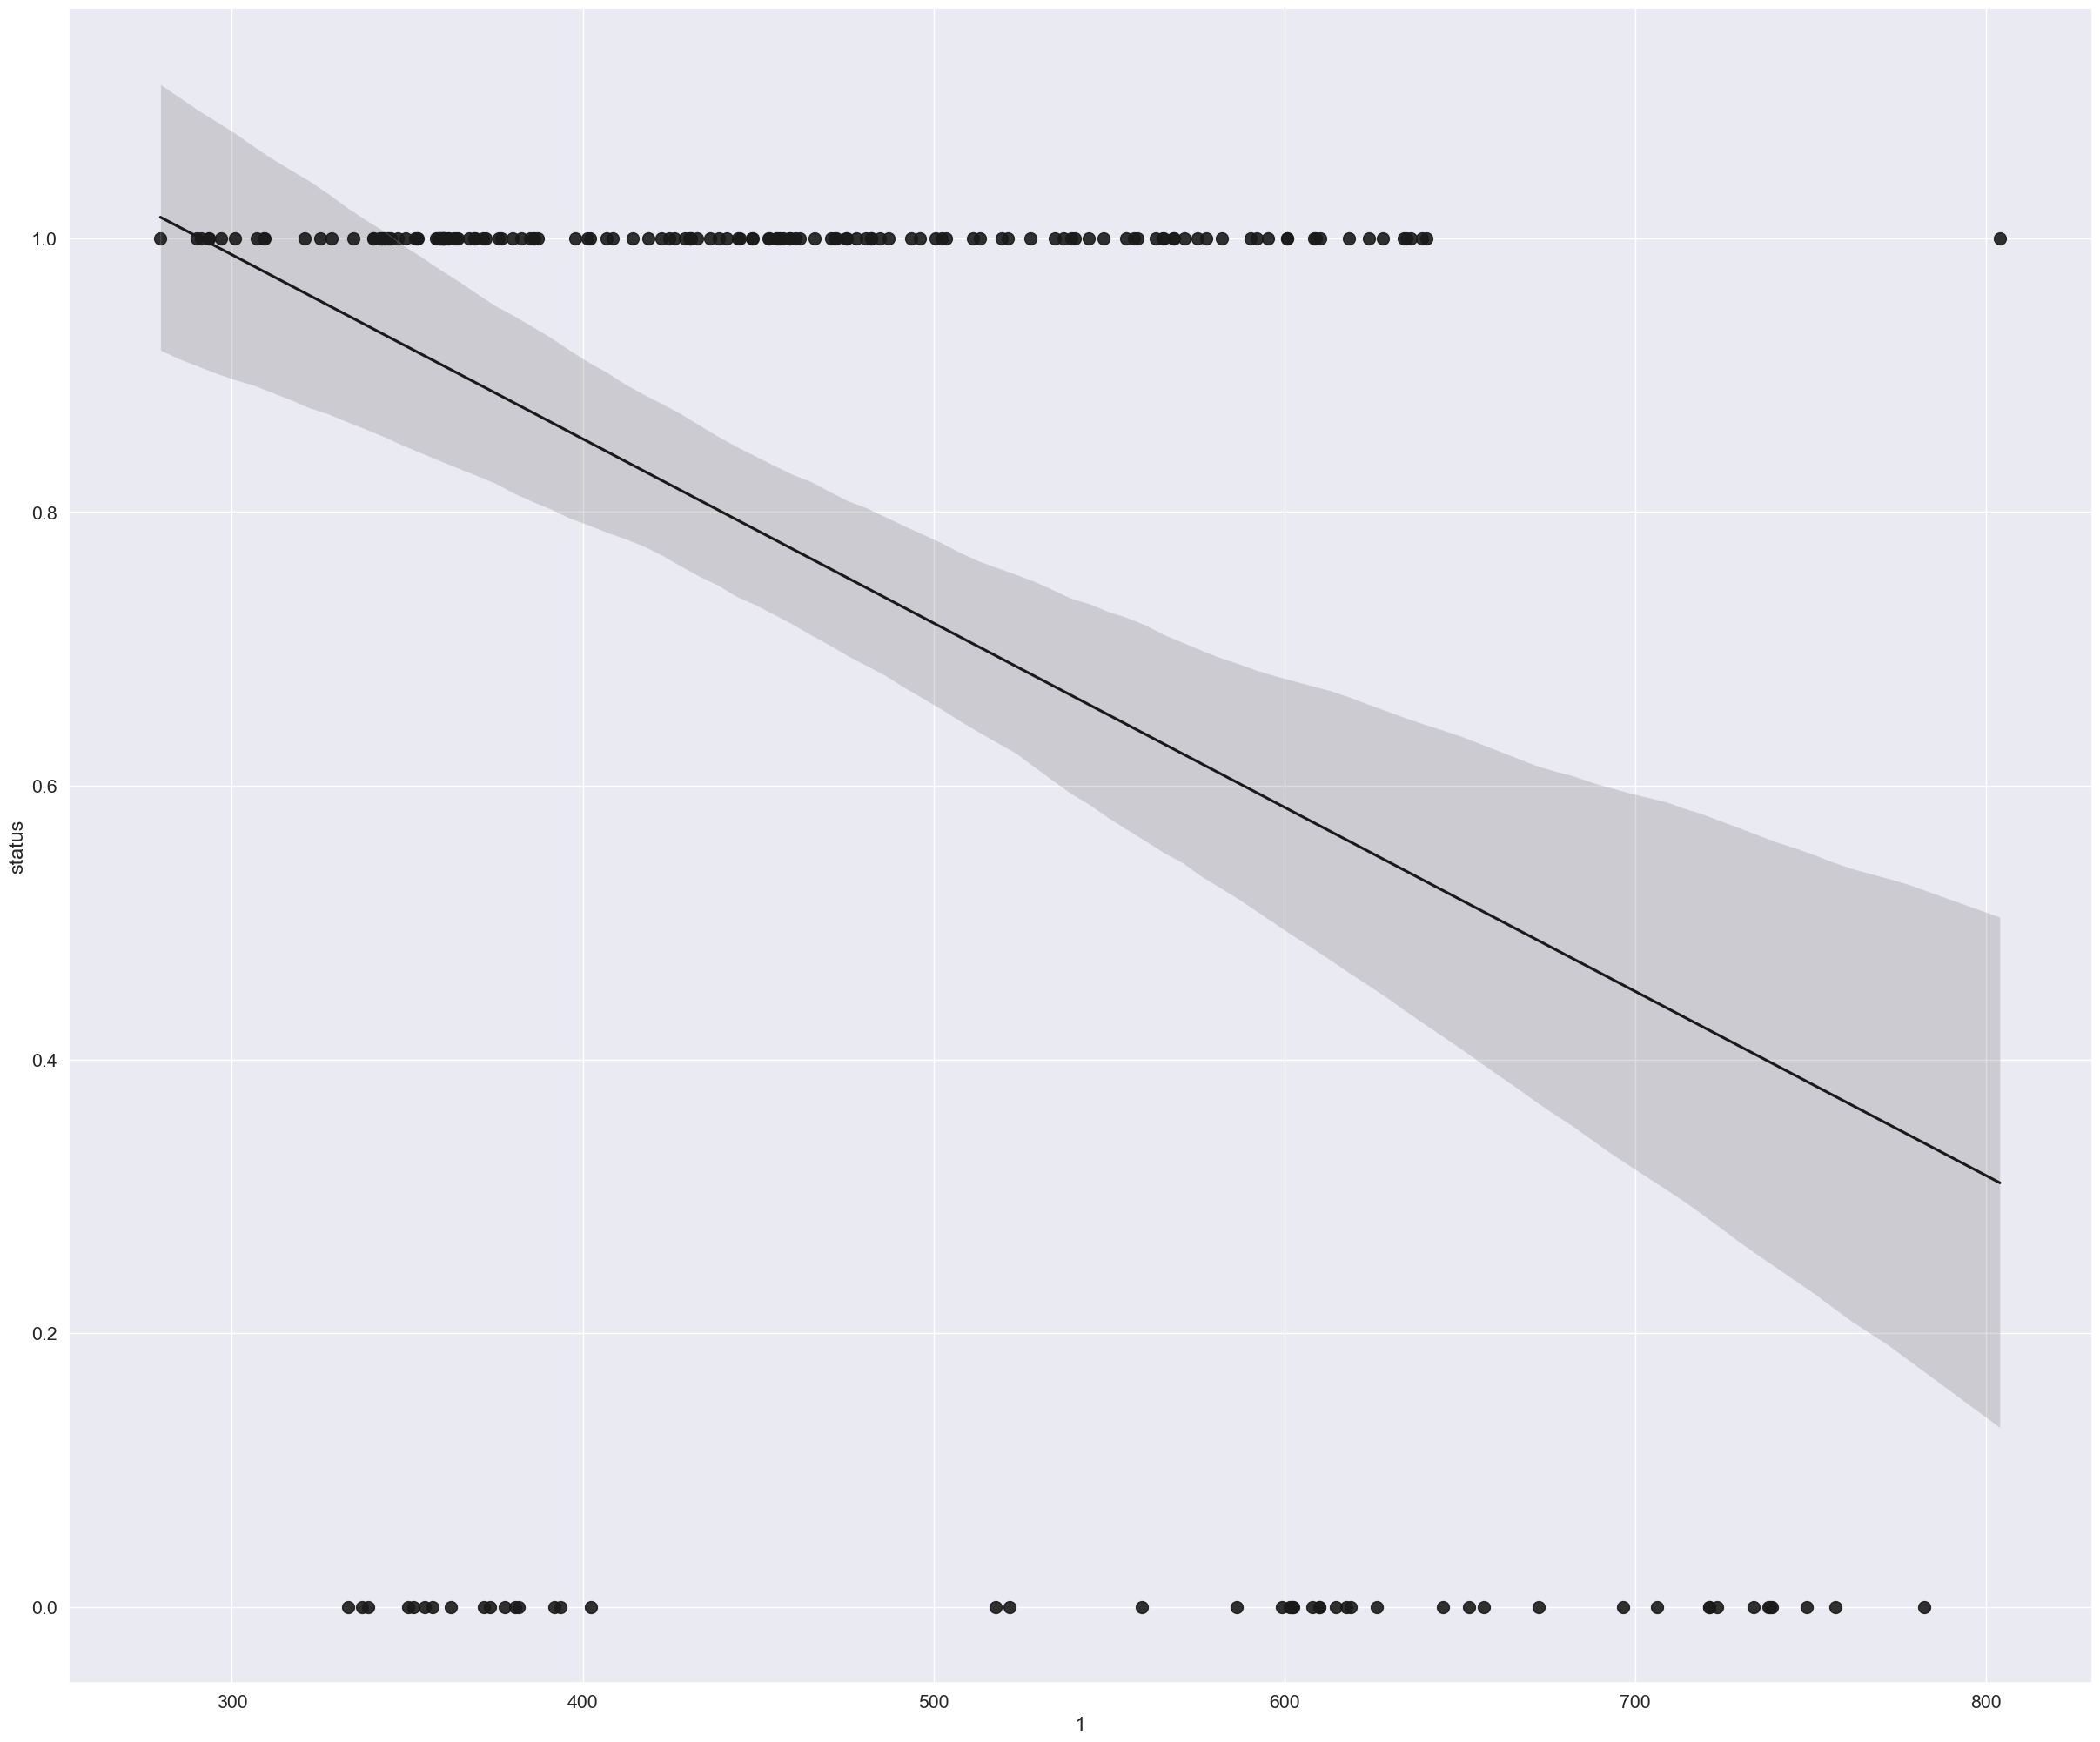

In [683]:
sns.regplot(x=PCA_df.iloc[::,1:2], y=PCA_df.iloc[::,2:3],
            data=PCA_df , color='k', scatter_kws={'s':100,"alpha" : 0.9})


In [454]:
X=pd.DataFrame(pca_recovered.T).iloc[::,0:2]
model_list=[]
for i in range(30):
    X_train, X_test, y_train, y_test=train_test_split(pdata,y,test_size=0.30,random_state=i)
    X_train=StandardScaler().fit_transform(X_train)
    X_test=StandardScaler().fit_transform(X_test)
    
    RF_model = RandomForestClassifier(n_estimators = 100,random_state=1177) 
    RF_model = RF_model.fit(X_train, y_train)
    y_predict_rf = RF_model.predict(X_test)
    RF_model_score=RF_model.score(X_test, y_test)
    model_list.append('RF_model '+str(i))
    model_list.append(RF_model_score)
    
    GaussianNB_model = GaussianNB().fit(X_train, y_train)
    y_predict_GaussianNB=GaussianNB_model.predict(X_test)
    GaussianNB_model_score=GaussianNB_model.score(X_test,y_test)
    model_list.append('GaussianNB_model '+str(i))
    model_list.append(GaussianNB_model_score)
    
    neighbor_model=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
    y_predict_neighbor=neighbor_model.predict(X_test)
    neighbor_model_score=neighbor_model.score(X_test,y_test)
    model_list.append('neighbor_model '+str(i))
    model_list.append(neighbor_model_score)
    
    svm_model=SVC(random_state=0).fit(X_train,y_train)
    y_predict_svm=svm_model.predict(X_test)
    svm_model_score=svm_model.score(X_test,y_test)
    model_list.append('svm_model '+str(i))
    model_list.append(svm_model_score)   
    
    tree_model=DecisionTreeClassifier(max_depth=6,random_state=117).fit(X_train,y_train)
    y_predict_tree=tree_model.predict(X_test)
    tree_model_score = tree_model.score(X_test, y_test)
    model_list.append('tree_model '+str(i))
    model_list.append(tree_model_score)
    
    LR_model = LogisticRegression(solver="liblinear",random_state=117).fit(X_train,y_train)
    y_predict_LR = LR_model.predict(X_test)
    LR_model_score = LR_model.score(X_test, y_test)
    model_list.append('LR_model '+str(i))
    model_list.append(LR_model_score)

    XGBC_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=4,random_state=0)
    XGBC_model = XGBC_model.fit(X_train, y_train)
    y_predict_XGB = XGBC_model.predict(X_test)
    XGBC_model_score=accuracy_score(y_test, y_predict_XGB)
    model_list.append('XGBC_model '+str(i))
    model_list.append(XGBC_model_score)

    ABC = AdaBoostClassifier(n_estimators=50, random_state=117)
    ABC = ABC.fit(X_train, y_train)
    y_predict_ABC = ABC.predict(X_test)
    ABC_score=ABC.score(X_test , y_test)
    model_list.append('ABC '+str(i))
    model_list.append(ABC_score)

In [455]:
RF_avg_score=statistics.mean(model_list[1::16])
GaussianNB_avg_score=statistics.mean(model_list[3::16])
neighbor_avg_score=statistics.mean(model_list[5::16])
svm_avg_score=statistics.mean(model_list[7::16])
tree_avg_score=statistics.mean(model_list[9::16])
LR_avg_score=statistics.mean(model_list[11::16])
XGBC_avg_score=statistics.mean(model_list[13::16])
ABC_avg_score=statistics.mean(model_list[15::16])

In [456]:
print(RF_avg_score,GaussianNB_avg_score,neighbor_avg_score,
      svm_avg_score,tree_avg_score,LR_avg_score,XGBC_avg_score,ABC_avg_score)

0.8627118644067797 0.692090395480226 0.8338983050847457 0.8259887005649718 0.827683615819209 0.8203389830508474 0.8627118644067797 0.8062146892655367
